## Assignment 7.1 Pitching Your ML Algorithm

### Problem Statement and Approach

Many people struggle to get loans due to insufficient or non-existent credit histories. So, unfortunately this population is often taken advantage off by untrustworthy lenders.

In order to unlock the full potential of available data, statistical and machine learing methods can be leveraged to make predictions. This approach will ensure that clients capable of repayment are not rejected and that loans are provided with a principla, maturity and repayment calendar that will empower the clients to be successful.

#### Data Details

For this project kagle dataset used form link https://www.kaggle.com/c/home-credit-default-risk/data

#### Data:

application_{train|test}.csv

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).

Static data for all applications. One row represents one loan in our data sample.

#### Design
- Detailed step for ML model building activity
##### [Data analysis:- perform an Exploratory data analysis on the data](#data_analysis)
- Import the data,Perform Univariate analysis and Bivariate analysis - Use appropriate visualizations to identify the patterns and insights, Prepare the data for analysis
#### [Feature engineering](#Feature_Engineering)
- Missing value Treatment, Outlier Detection (treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling
#####  [Feature selection](#Feature_Selection)
-  Reduce Dimensionality and selecte the features for model building
#### [Algorithm selection](#Algorithm)
- Selecting the models for building
##### [Model building - Bagging](#Bagging)
- Build bagging classifier, random forest, and decision tree.
##### [Model building - Boosting](#Boosting)
- Build Adaboost, gradient boost, xgboost, and stacking classifier
##### [Model performance improvement](#Improvement)
- model performance - trying to find if model performance be improved.
##### [Comparing performance of models ](#Comparison)
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement
##### [Recommendations](#Insight)
- Conclude with the key takeaways for the business and recommendations.

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sundarsundaresan47","key":"533970fe455c0994856a85ac1ffc6622"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle competitions download -c home-credit-default-risk

 99% 684M/688M [00:04<00:00, 221MB/s]
100% 688M/688M [00:04<00:00, 159MB/s]


In [ ]:
!mkdir /content/home-credit-default-risk
!unzip /content/home-credit-default-risk.zip -d /content/home-credit-default-risk/

Archive:  /content/home-credit-default-risk.zip
  inflating: /content/home-credit-default-risk/HomeCredit_columns_description.csv  
  inflating: /content/home-credit-default-risk/POS_CASH_balance.csv  
  inflating: /content/home-credit-default-risk/application_test.csv  
  inflating: /content/home-credit-default-risk/application_train.csv  
  inflating: /content/home-credit-default-risk/bureau.csv  
  inflating: /content/home-credit-default-risk/bureau_balance.csv  
  inflating: /content/home-credit-default-risk/credit_card_balance.csv  
  inflating: /content/home-credit-default-risk/installments_payments.csv  
  inflating: /content/home-credit-default-risk/previous_application.csv  
  inflating: /content/home-credit-default-risk/sample_submission.csv  


In [ ]:
#Loading dataset
train=pd.read_csv("/content/home-credit-default-risk/application_train.csv")

In [ ]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- As the dataset is huge we will be processing the datatypes to ensure optimum memory usage

### Code to chnage the datatype to improve the memory consumption by huge dataset

In [ ]:
# ref : inspired by https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65/notebook
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


### Data analysis:- perform an Exploratory data analysis on the data <a id='data_analysis'></a>

In [ ]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 59.54 MB
Decreased by 79.2%


- As we see the memory consumption is now reduced by `79.2%`, it was previously consuming 286.23 MB and not it is reduced to 59.54 MB

In [ ]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

- After pre-processing the imported datasets the memory consumption reduced from `286+ MB` tp `~79 MB`

In [ ]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train[missing_train['Percent']>50]

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
LIVINGAPARTMENTS_MEDI     210199  68.354953
FLOORSMIN_AVG             208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_MEDI            208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MEDI             182590  59.376738
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738
BASEMENTAREA_MEDI         179943  58.515956
BASEMENTAREA_AVG          179943  58.515956
BASEMENTAREA_MODE         179943  58.515956
EXT_SOURCE_1              173378  56.381073
NONLIVINGAREA_MODE        169682  55.179164
NONLIVINGAREA_AVG         169682  55.179164
NONLIVINGAREA_MEDI        169682  55.179164
ELEVATORS_MEDI            163891  53.295980
ELEVATORS_AVG             163891  53.295980
ELEVATORS_MODE            163891  53.295980
WALLSMATERIAL_MODE        156341  50.840783
APARTMENTS_MEDI           156061  50.749729
APARTMENTS_AVG            156061  50.749729
APARTMENTS_MODE           156061  50.749729
ENTRANCES_MEDI            154828  50.348768
ENTRANCES_AVG             154828  50.348768
ENTRANCES_MODE            154828  50.348768
LIVINGAREA_AVG            154350  50.193326
LIVINGAREA_MODE           154350  50.193326
LIVINGAREA_MEDI           154350  50.193326
HOUSETYPE_MODE            154297  50.176091

- Looks like there are many features for which 50% of the data is missing we can drop these features

In [ ]:
train_drop_missing = train[train.columns[train.isnull().mean() < 0.50]]

In [ ]:
#Validating the features after removing the feature with high missing data
train_drop_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int32   
 1   TARGET                        307511 non-null  int8    
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  int8    
 7   AMT_INCOME_TOTAL              307511 non-null  float32 
 8   AMT_CREDIT                    307511 non-null  float32 
 9   AMT_ANNUITY                   307499 non-null  float32 
 10  AMT_GOODS_PRICE               307233 non-null  float32 
 11  NAME_TYPE_SUITE               306219 non-null  category
 12  NAME_INCOME_TYPE              

In [ ]:
print(train_drop_missing.shape)

(307511, 81)


- After dropping the features for which missing data was > 50 % we are left with `81` columns and `307511` rows.
- There are still missing values for columns that we will need to manage

In [ ]:
# checking missing data
total_missing = train_drop_missing.isnull().sum().sort_values(ascending = False)
percent_missing = (train_drop_missing.isnull().sum()/train_drop_missing.isnull().count()*100).sort_values(ascending = False)
datatype_missing = train_drop_missing.dtypes
missing_train_df = pd.concat([total_missing, percent_missing,datatype_missing], axis=1, keys=['Total missing', 'Percent missing','dtypes'])
missing_train_df[missing_train['Percent']>0]

Total missing  Percent missing    dtypes
FLOORSMAX_AVG                        153020        49.760822   float16
FLOORSMAX_MODE                       153020        49.760822   float16
FLOORSMAX_MEDI                       153020        49.760822   float16
YEARS_BEGINEXPLUATATION_AVG          150007        48.781019   float16
YEARS_BEGINEXPLUATATION_MODE         150007        48.781019   float16
YEARS_BEGINEXPLUATATION_MEDI         150007        48.781019   float16
TOTALAREA_MODE                       148431        48.268517   float16
EMERGENCYSTATE_MODE                  145755        47.398304  category
OCCUPATION_TYPE                       96391        31.345545  category
EXT_SOURCE_3                          60965        19.825307   float16
AMT_REQ_CREDIT_BUREAU_YEAR            41519        13.501631   float16
AMT_REQ_CREDIT_BUREAU_HOUR            41519        13.501631   float16
AMT_REQ_CREDIT_BUREAU_DAY             41519        13.501631   float16
AMT_REQ_CREDIT_BUREAU_WEEK            41519        13.501631   float16
AMT_REQ_CREDIT_BUREAU_MON             41519        13.501631   float16
AMT_REQ_CREDIT_BUREAU_QRT             41519        13.501631   float16
NAME_TYPE_SUITE                        1292         0.420148  category
DEF_30_CNT_SOCIAL_CIRCLE               1021         0.332021   float16
OBS_60_CNT_SOCIAL_CIRCLE               1021         0.332021   float16
DEF_60_CNT_SOCIAL_CIRCLE               1021         0.332021   float16
OBS_30_CNT_SOCIAL_CIRCLE               1021         0.332021   float16
EXT_SOURCE_2                            660         0.214626   float16
AMT_GOODS_PRICE                         278         0.090403   float32
AMT_ANNUITY                              12         0.003902   float32
CNT_FAM_MEMBERS                           2         0.000650   float16
DAYS_LAST_PHONE_CHANGE                    1         0.000325   float16

- There are 26 keyfigures available with missing data, out of that 3 features are `Categorical` and rest all are `float`.

- we will review all the categorical variables now

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(x,z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(x[z]) # length of the column
    plt.figure(figsize=(20,5))
    ax = sns.countplot(x=x[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot

        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

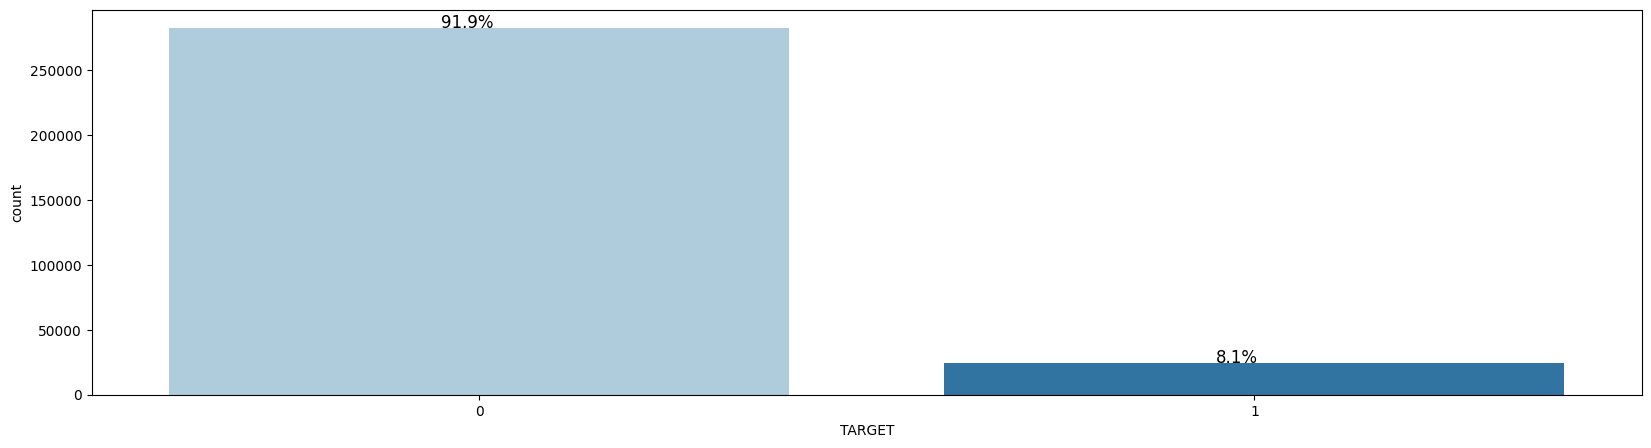

In [ ]:
perc_on_bar(train_drop_missing,'TARGET')

- Data is not balanced there are 91.9% records for `TARGET = 0` and only 8.1% records are for `TARGET = 1` in the dataset.

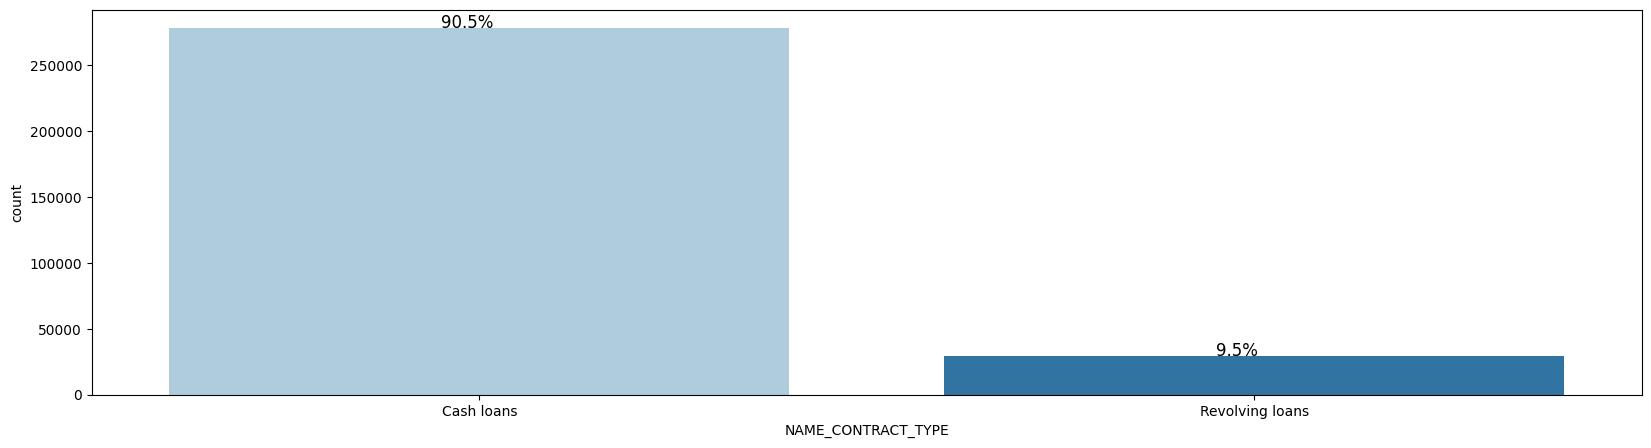

In [ ]:
perc_on_bar(train_drop_missing,'NAME_CONTRACT_TYPE')

- There are `90.5%` of the records for `Cash loans` and only `9.5%` records are available for `Revolving loans`

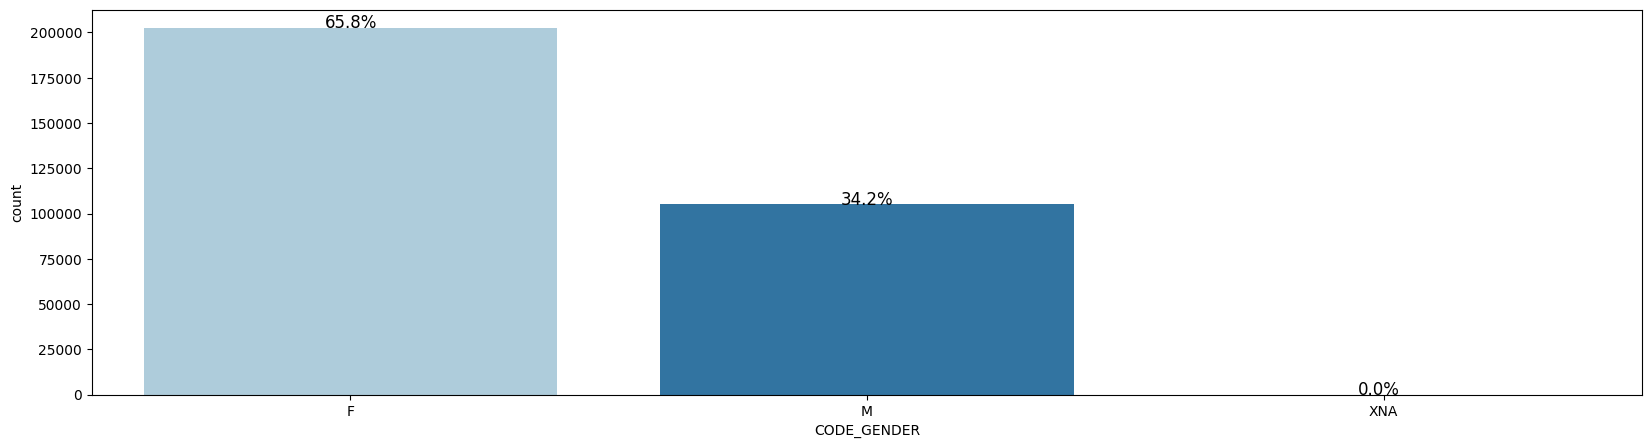

In [ ]:
perc_on_bar(train_drop_missing,'CODE_GENDER')

- all the `XNA` to be treated as `NaN` and need to handle this as NaN.
- there are 65.8% values belongs to Gender `Female`
- Replacing the `XNA` with `F`

In [ ]:
train_drop_missing["CODE_GENDER"].replace("XNA","F", inplace=True)
train_drop_missing["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

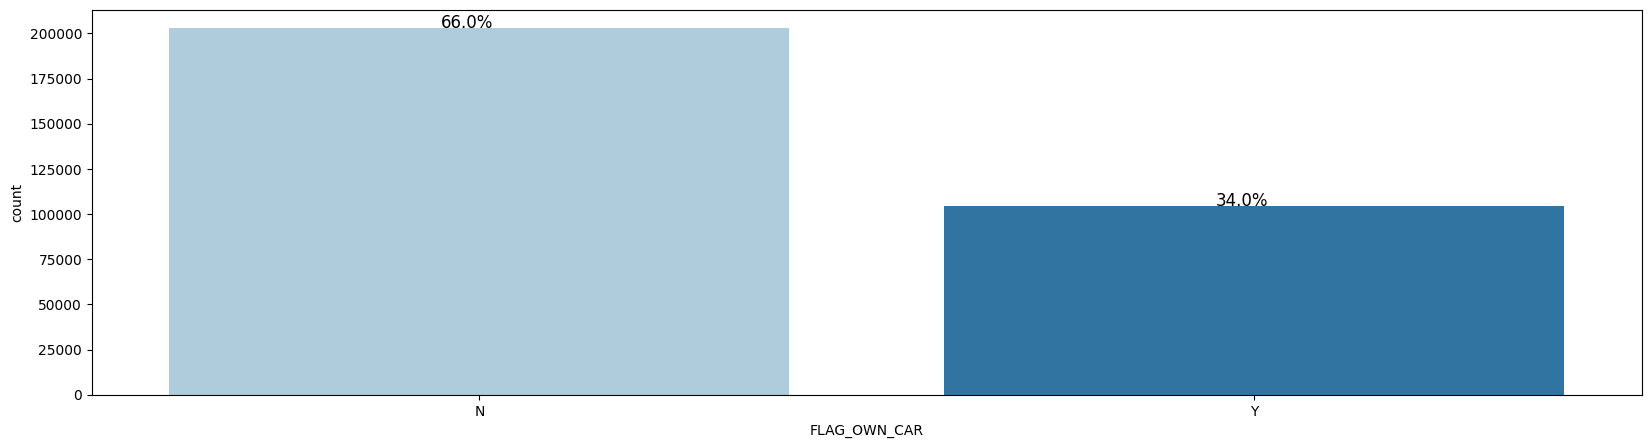

In [ ]:
perc_on_bar(train_drop_missing,'FLAG_OWN_CAR')

- There are `66 %` customer in dataset who do not own any car and `34 %` customers own a car
- This represent most of the customers belongs to middle or lower middle class of economy

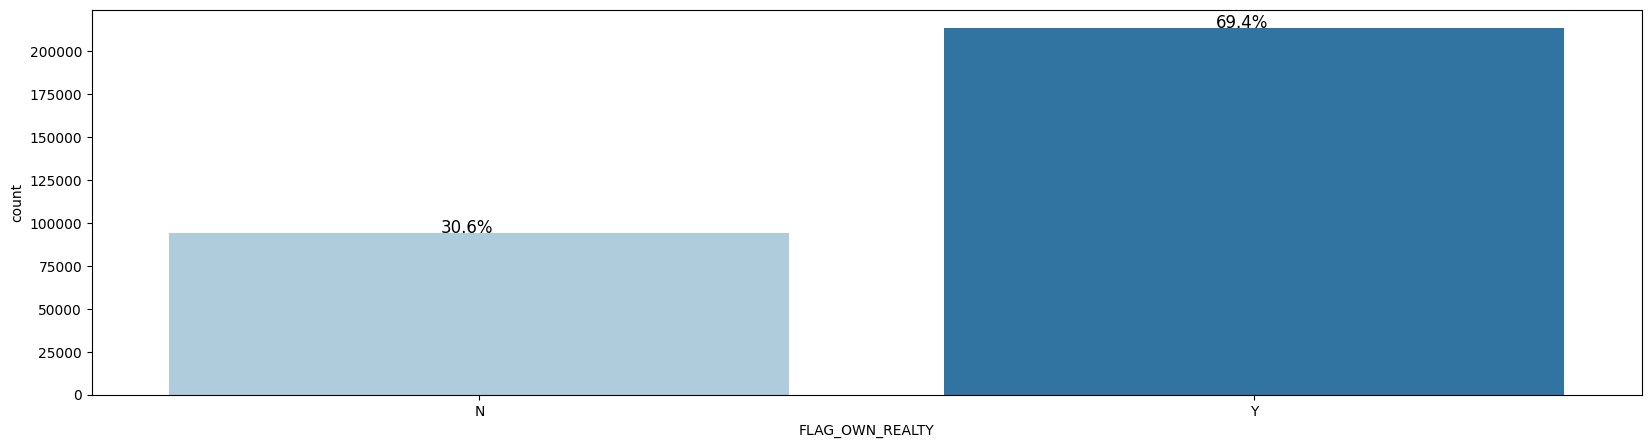

In [ ]:
perc_on_bar(train_drop_missing,'FLAG_OWN_REALTY')

- `69.4%` of customers own a Reality and `30.6%` have no real estate property

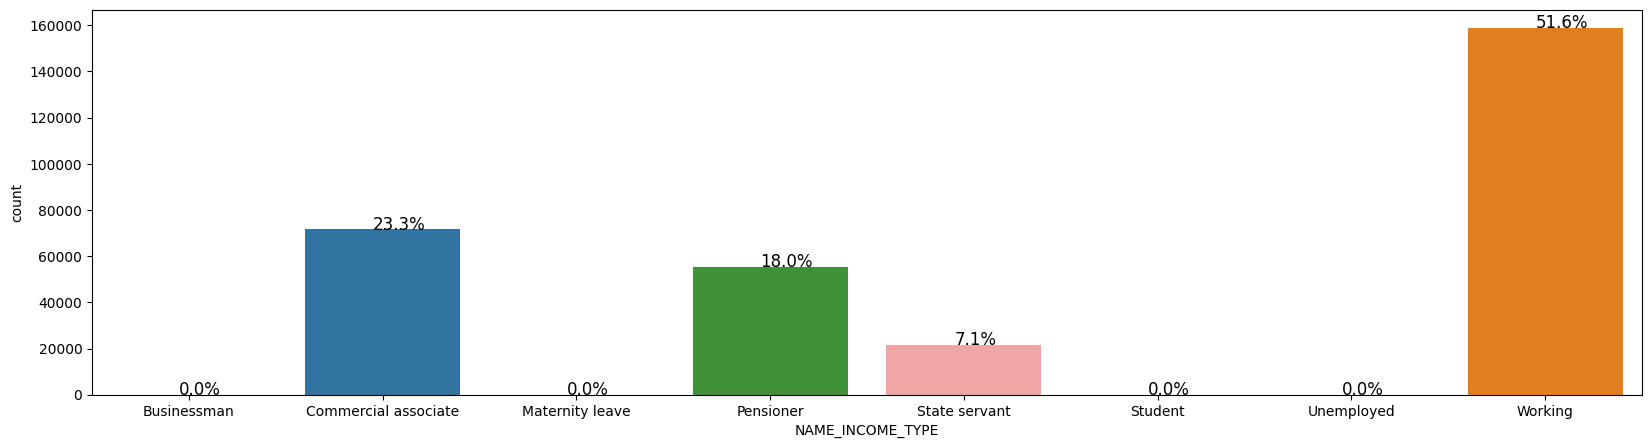

In [ ]:
perc_on_bar(train_drop_missing,'NAME_INCOME_TYPE')

- Maximum number of customer `(51.6%)`are from `Working` class follow by `Commercial associates` `23.3 % `as second highest type of income.

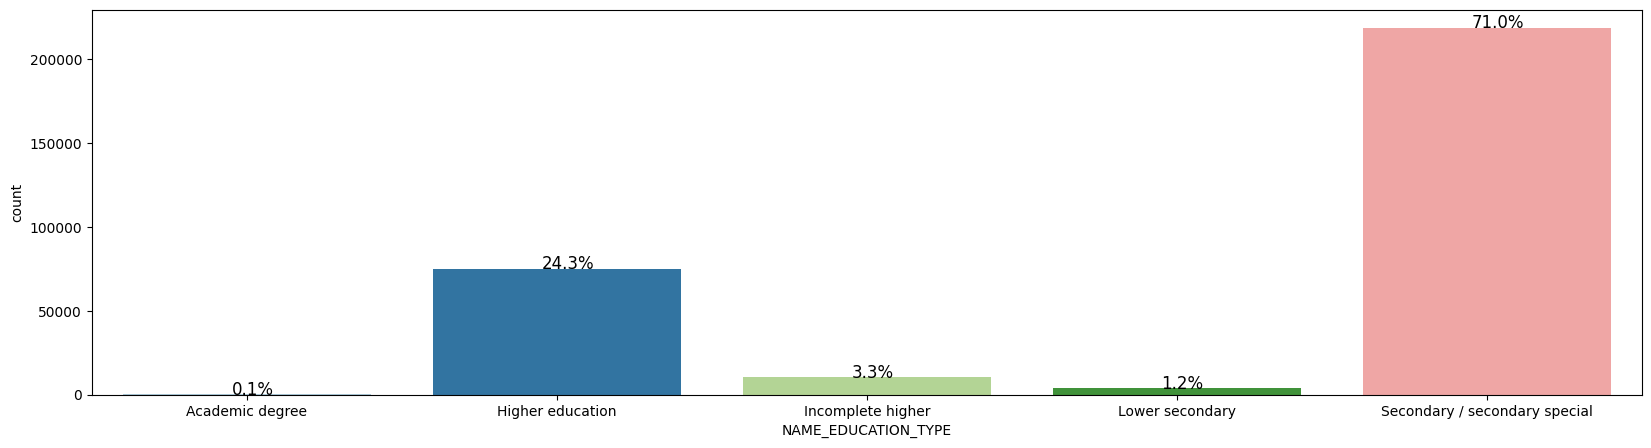

In [ ]:
perc_on_bar(train_drop_missing,'NAME_EDUCATION_TYPE')

- Secondary/ secondary special is the education level for `71 %`of Customers, followed by `24.3%`of customers have `Higher Education`

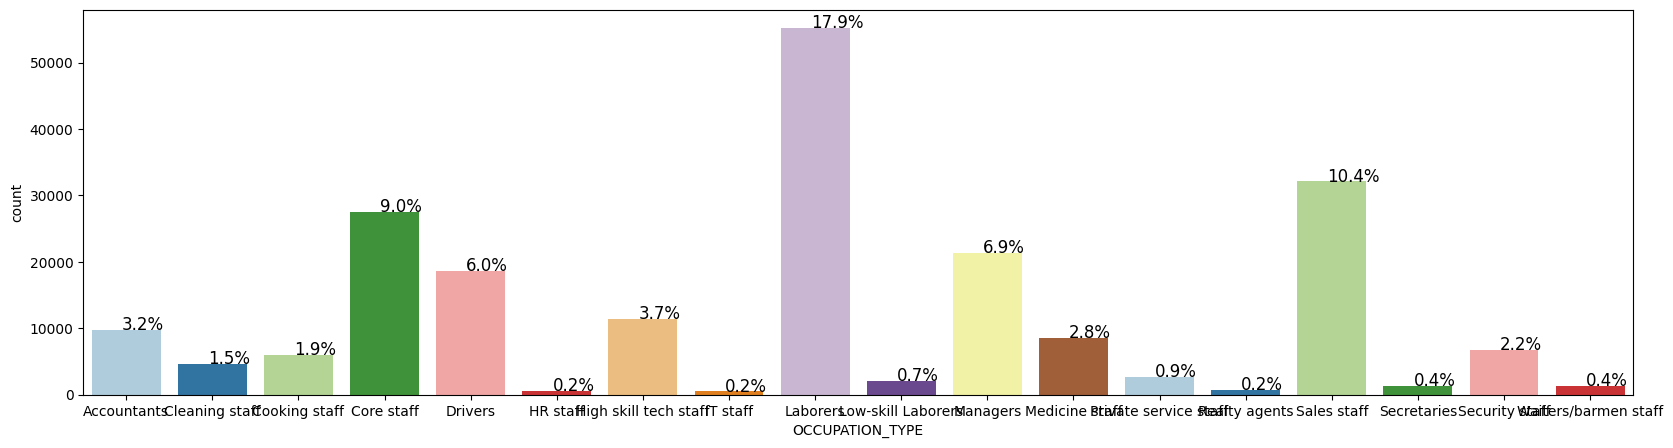

In [ ]:
perc_on_bar(train_drop_missing,'OCCUPATION_TYPE')

- Most of the customer are from working class

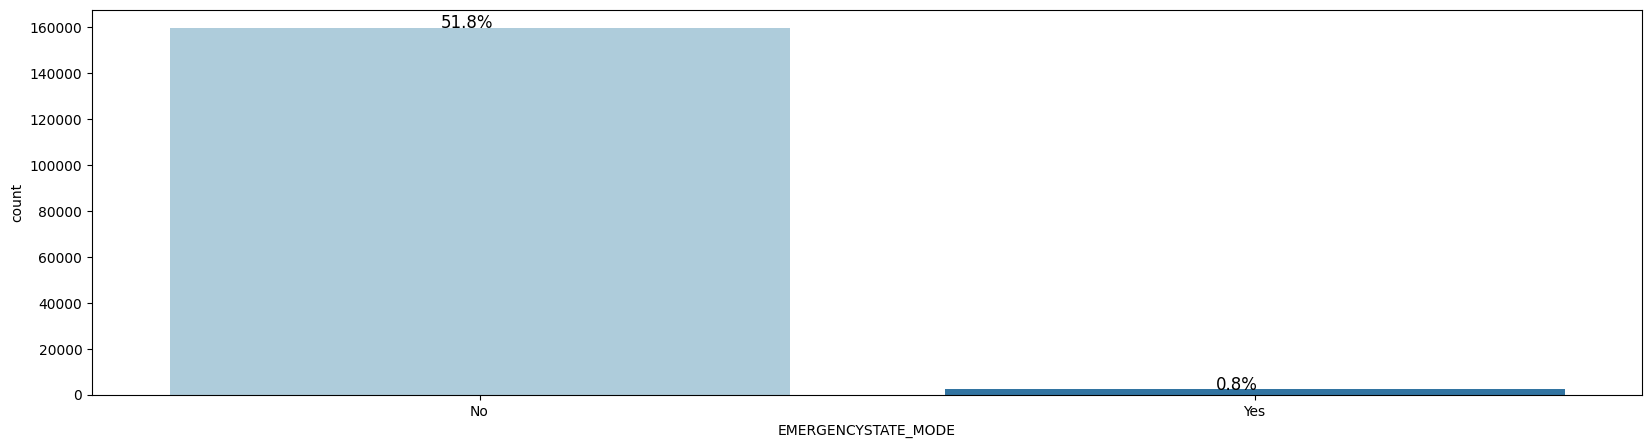

In [ ]:
perc_on_bar(train_drop_missing,'EMERGENCYSTATE_MODE')

- A little less than `49%` of the records are blank for feature `EMERGENCYSTATE_MODE`

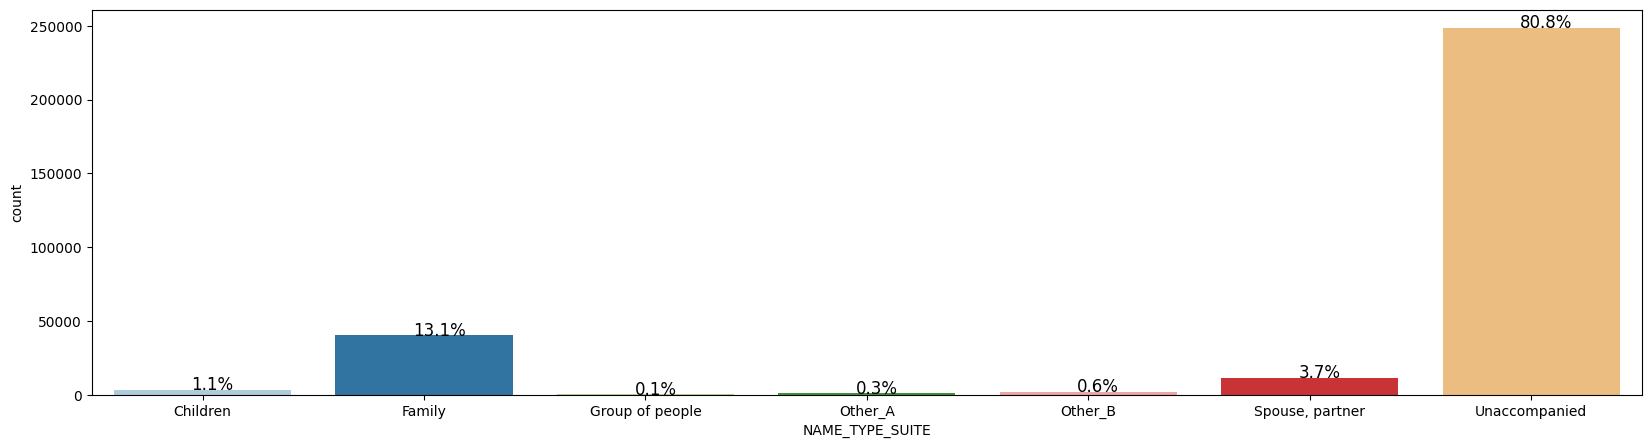

In [ ]:
perc_on_bar(train_drop_missing,'NAME_TYPE_SUITE')

- `80 %` of the customer records in this dataset are for people who are living alone not accompanied by anyone.

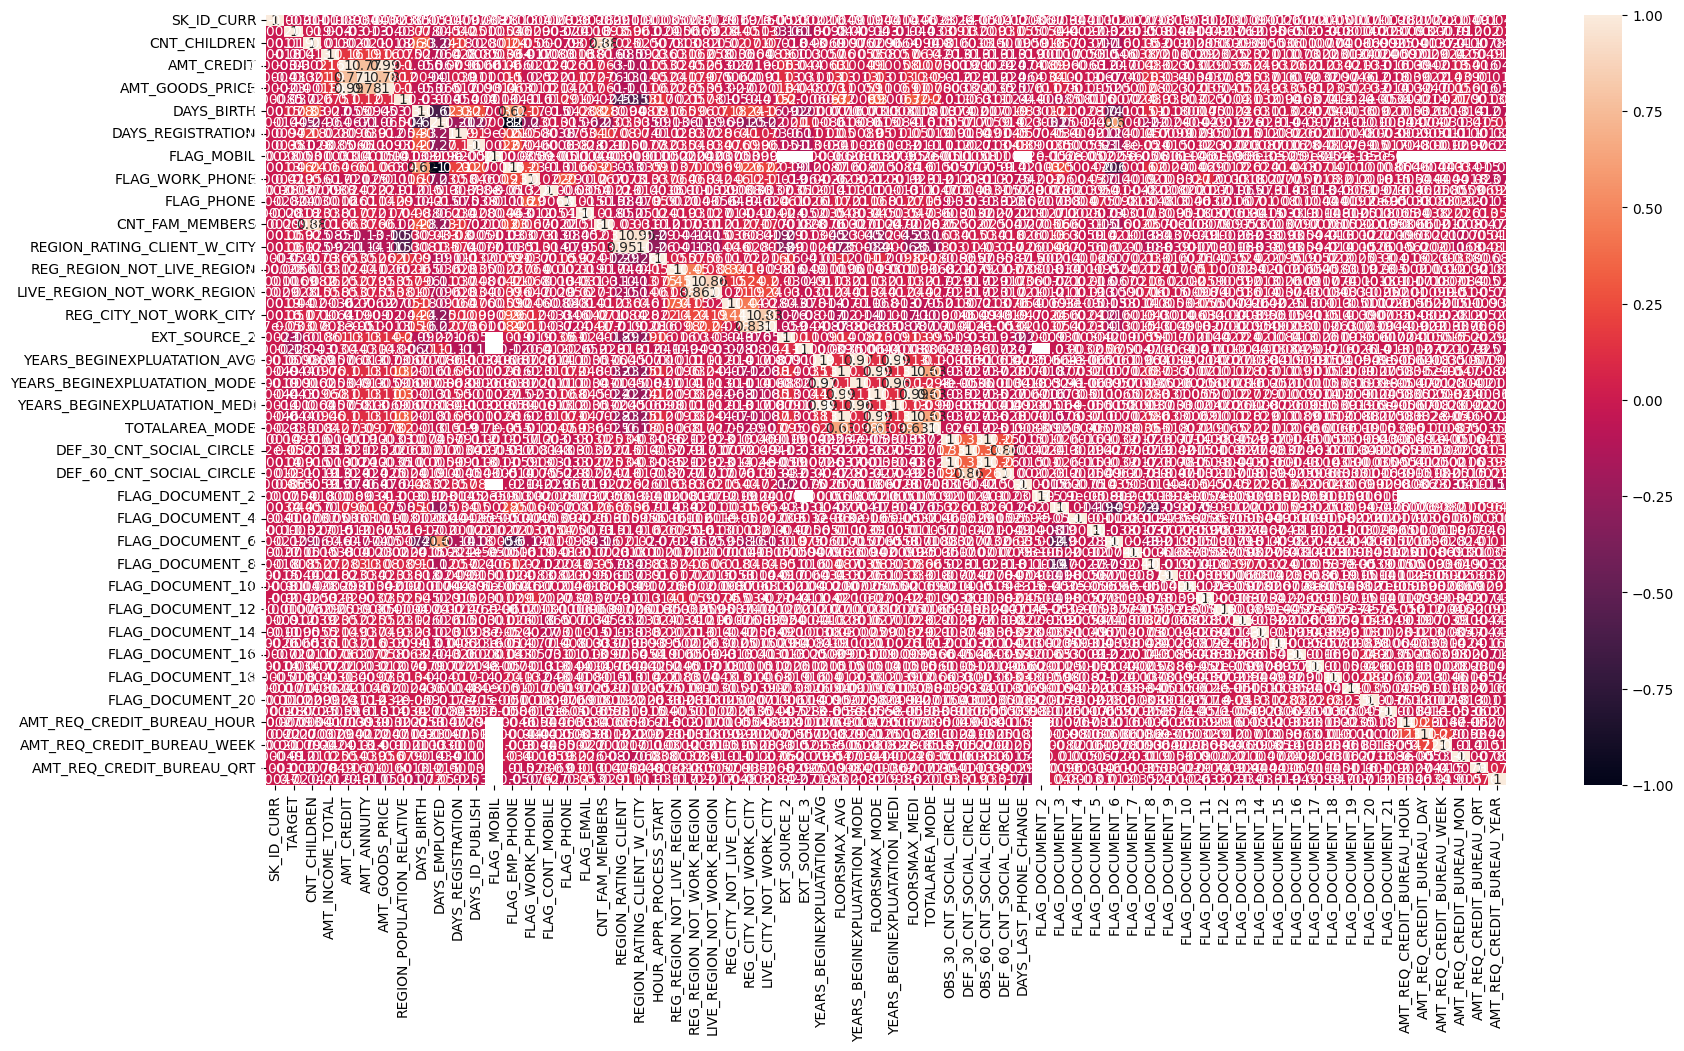

In [ ]:
#Checking the correlation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(train_drop_missing.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

- Looks like there are some strong positive and negative correlation in the dataset.
- This is difficut to analyze such a huge dataset for correlation in detail.

In [ ]:
all_col = train_drop_missing.columns.tolist()

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# The below function will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        x=feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        x=feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

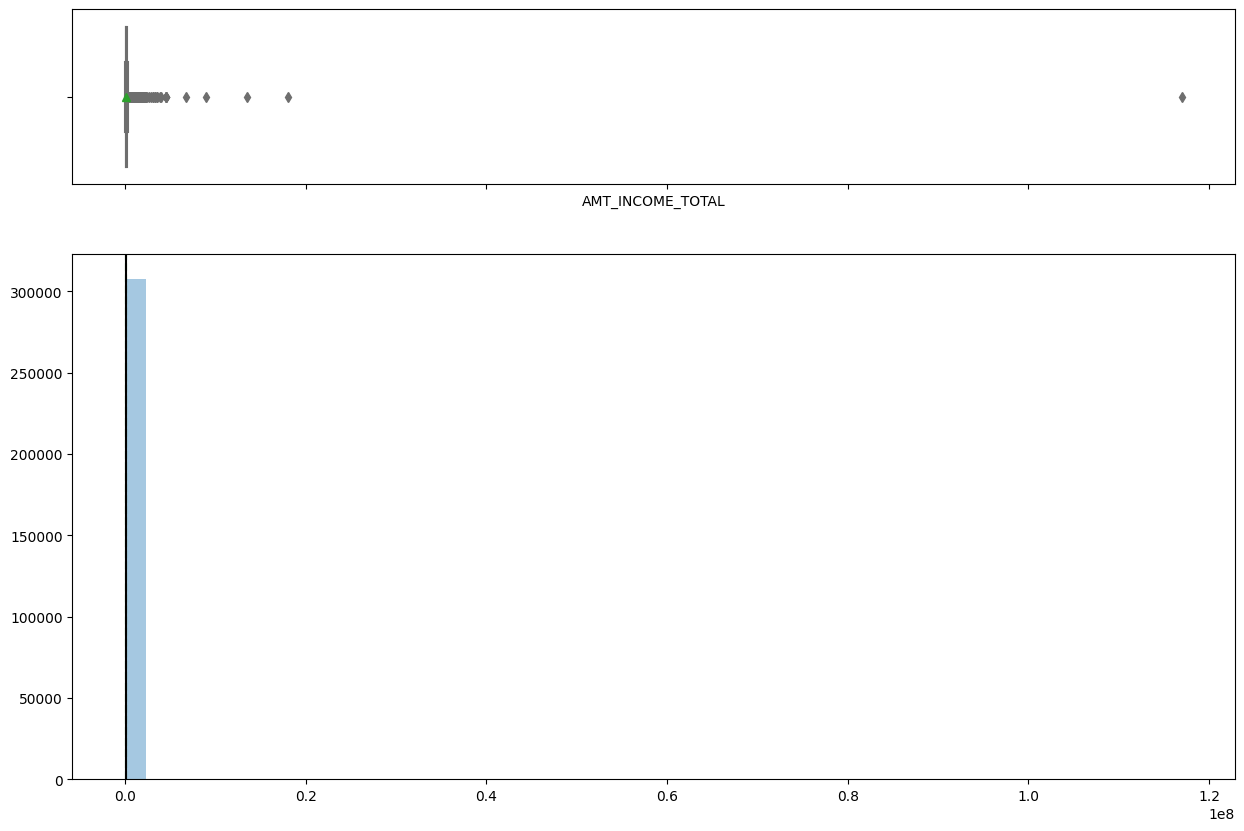

In [ ]:
histogram_boxplot(train_drop_missing["AMT_INCOME_TOTAL"])

- looks like there is one huge outlier in the dataset for income.
- this may be a situation where salary of CEO will be very high
- as this is a realistic scenario we will leave this value as is.

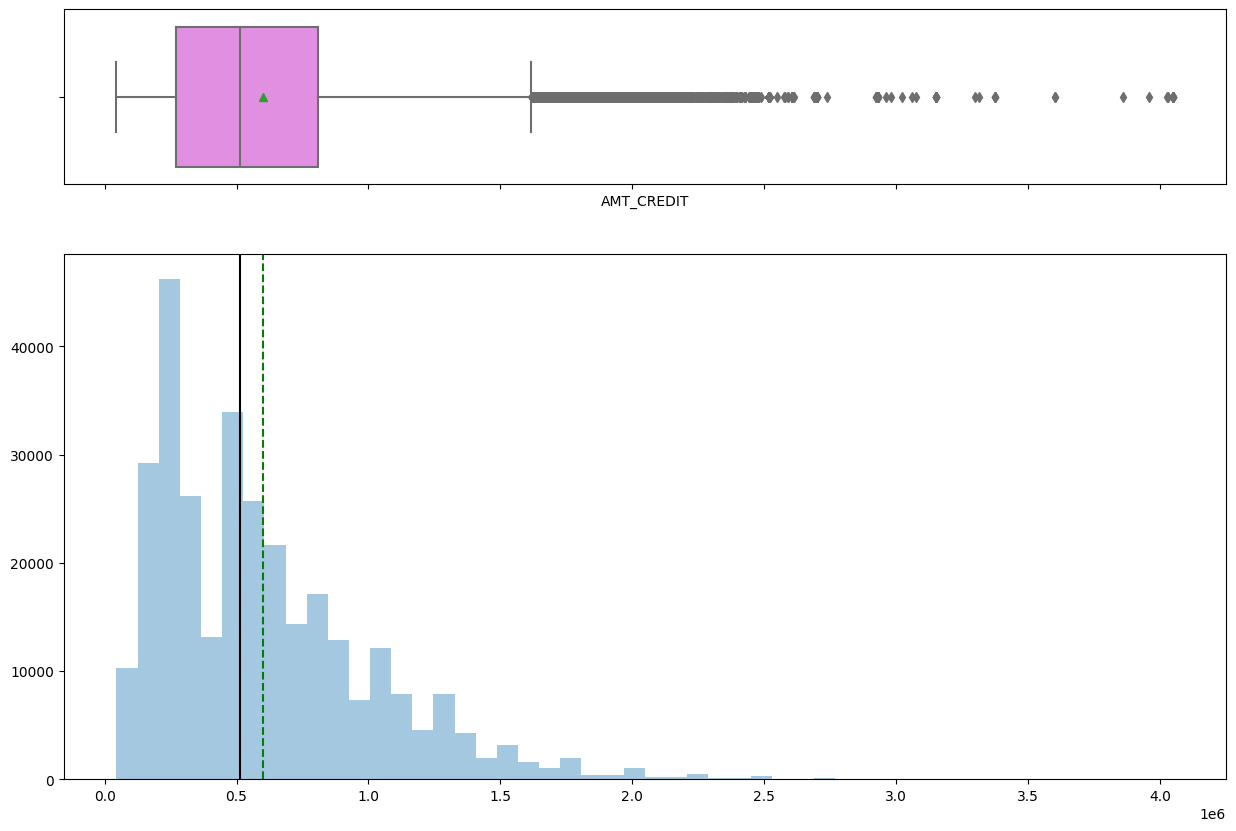

In [ ]:
histogram_boxplot(train_drop_missing["AMT_CREDIT"])

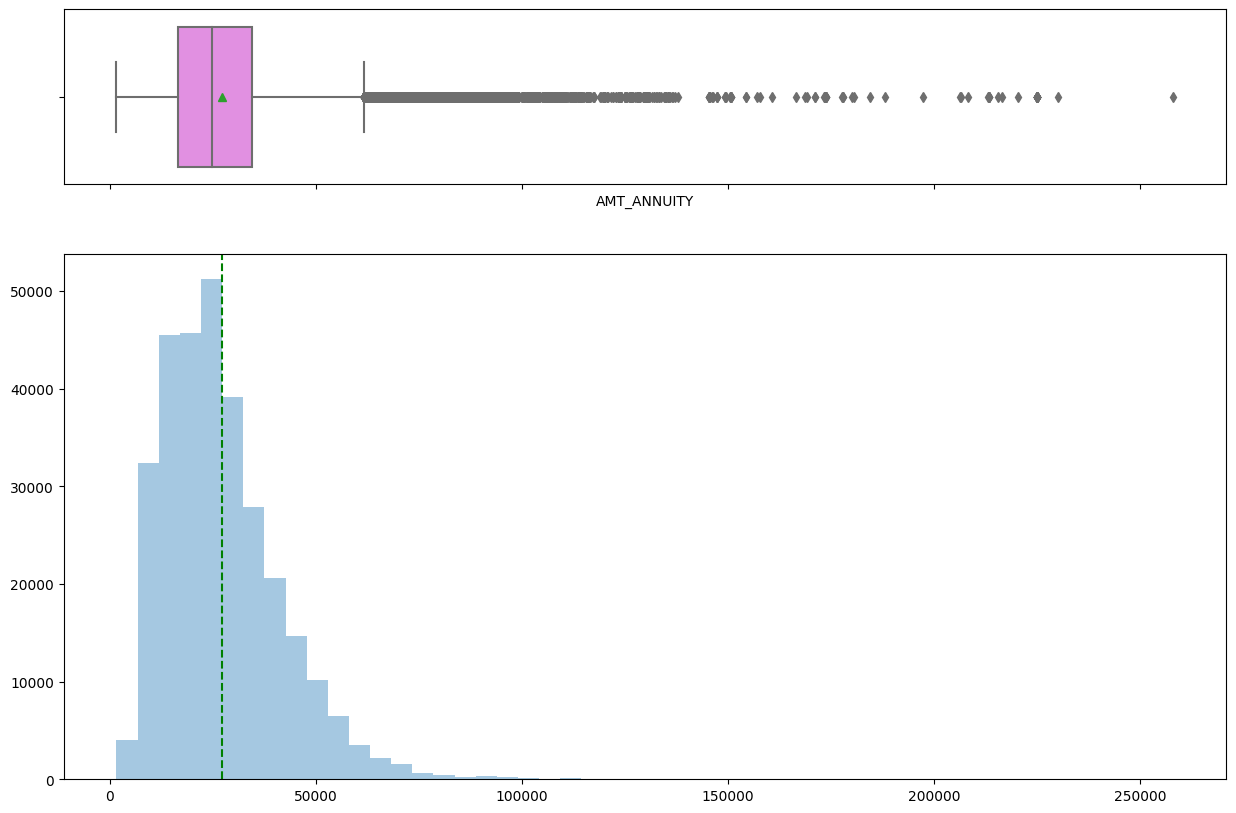

In [ ]:
histogram_boxplot(train_drop_missing["AMT_ANNUITY"])

- It looks like we have a dataset with huge dimensionality.
- There are outliers in the dataset.
- we have to deal with missing value also.

# Feature Engineering<a id='Feature_Engineering'></a>

#### Missing value treatment

In [ ]:
train_cat_features = [cat_col for cat_col in train_drop_missing.columns if train_drop_missing[cat_col].dtype.name == 'category']
train_drop_missing = pd.get_dummies(train_drop_missing, columns=train_cat_features)

In [ ]:
#Separate target variable
y = train_drop_missing['TARGET']
#del train_drop_missing['TARGET']
train_drop_missing.drop('TARGET',axis=1,inplace=True)

In [ ]:
# drop SK_ID_CURR from dataset as this has all unique records, and this is Statistically less significant
train_drop_missing.drop('SK_ID_CURR',axis=1,inplace=True)

In [ ]:
train_col=list(train_drop_missing.columns)

In [ ]:
imputer = SimpleImputer(strategy = 'median')
train_imputed = imputer.fit_transform(train_drop_missing)
train_df=pd.DataFrame(abs(train_imputed))
#train_df.head()
# scaling the data using the standard scaler
train_scaled = StandardScaler().fit_transform(train_imputed)

In [ ]:
#Create train and validation set from training data
train_x, valid_x, train_y, valid_y = train_test_split(train_scaled, y, test_size=0.9, random_state=1,stratify=y)

#### Upsampling using SMOTE (Synthetic Minority Over Sampling Technique)

* Imbalanced datasets impact outcome of ML models negatively when the class of importance is under represented
* The ML algorithms such as decisiontrees,logisticregressions are designed to reduce overall inaccuracies and hence get biased towards over represented class
* When class of importance is underrepresented,no amount of tuning the models will help
* Suppose we have 1000 records of which 20 are fraudulent cases and 980 normal cases. We have to predict fraudulent cases accurately. The event rate is only 2%. Conventional classifiers tend to perform higher Type II errors (fraudulent cases identified as normal).
* We have already seen in previous `module 1` and `module 2` assignment also that our given dataset has 8.1 % records with payment difficulties and 91.9% records are with other payment status.This clearly indicate that the dataset is not balanced.
* We shall handle the imbalanced dataset cases to minimize the TypeII errors by balancing the class representations using SMOTE(Synthetic Minority Oversampling TEchnique). Below is the summary of how this works.
    * consists of synthesizing elements for the minority class,based on those that already exist.
    * It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point.
    * Synthetic points are added between the chosen point and its neighbors.

In [ ]:
print("Before UpSampling, counts of label '1': {}".format((train_y==1).sum()))
print("Before UpSampling, counts of label '0': {} \n".format((train_y==0).sum()))
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
train_x_sm, train_y_sm = sm.fit_resample(train_x,train_y)
print("After UpSampling, counts of label '1': {}".format((train_y_sm==1).sum()))
print("After UpSampling, counts of label '0': {} \n".format((train_y_sm==0).sum()))

print('After UpSampling, the shape of X_smote: {}'.format(train_x_sm.shape))
print('After UpSampling, the shape of y_smote: {} \n'.format(train_y_sm.shape))

Before UpSampling, counts of label '1': 2482
Before UpSampling, counts of label '0': 28269 

After UpSampling, counts of label '1': 28269
After UpSampling, counts of label '0': 28269 

After UpSampling, the shape of X_smote: (56538, 191)
After UpSampling, the shape of y_smote: (56538,) 



In [ ]:
train_x_sm = pd.DataFrame(train_x_sm)
train_y_sm = pd.DataFrame(train_y_sm)
valid_x = pd.DataFrame(valid_x)
valid_y = pd.DataFrame(valid_y)

In [ ]:
train_x_sm.columns= [train_col]
valid_x.columns=[train_col]

# Feature Selection <a id='Feature_Selection'></a>

In [ ]:
train_drop_missing1=abs(train_drop_missing)
train_drop_missing1=train_drop_missing1.fillna(0)

#### Using the `SelectKBest` method selects the features according to the k highest score.

- SelectKBest works by retaining the first k features of X with the highest scores. I will be using K = 10.

In [ ]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(train_drop_missing1,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_drop_missing1.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best feature

                                    Specs         Score
7                           DAYS_EMPLOYED  1.954124e+08
4                         AMT_GOODS_PRICE  1.222709e+08
2                              AMT_CREDIT  7.669987e+07
6                              DAYS_BIRTH  2.235391e+06
1                        AMT_INCOME_TOTAL  1.624102e+06
8                       DAYS_REGISTRATION  1.348570e+06
39                 DAYS_LAST_PHONE_CHANGE  6.656759e+05
9                         DAYS_ID_PUBLISH  6.195946e+05
3                             AMT_ANNUITY  3.901107e+05
27                           EXT_SOURCE_3  7.720225e+02
90   NAME_EDUCATION_TYPE_Higher education  7.451081e+02
24                 REG_CITY_NOT_WORK_CITY  6.153774e+02
69                          CODE_GENDER_M  6.060355e+02
26                           EXT_SOURCE_2  5.604838e+02
23                 REG_CITY_NOT_LIVE_CITY  5.587089e+02
84             NAME_INCOME_TYPE_Pensioner  5.384165e+02
188                 ORGANIZATION_TYPE_XNA  5.332

In [ ]:
#Selecting 15 feature besed on their highest chi score
Selected_features=pd.DataFrame(featureScores.nlargest(15,'Score'))
Selected_features

Specs         Score
7                          DAYS_EMPLOYED  1.954124e+08
4                        AMT_GOODS_PRICE  1.222709e+08
2                             AMT_CREDIT  7.669987e+07
6                             DAYS_BIRTH  2.235391e+06
1                       AMT_INCOME_TOTAL  1.624102e+06
8                      DAYS_REGISTRATION  1.348570e+06
39                DAYS_LAST_PHONE_CHANGE  6.656759e+05
9                        DAYS_ID_PUBLISH  6.195946e+05
3                            AMT_ANNUITY  3.901107e+05
27                          EXT_SOURCE_3  7.720225e+02
90  NAME_EDUCATION_TYPE_Higher education  7.451081e+02
24                REG_CITY_NOT_WORK_CITY  6.153774e+02
69                         CODE_GENDER_M  6.060355e+02
26                          EXT_SOURCE_2  5.604838e+02
23                REG_CITY_NOT_LIVE_CITY  5.587089e+02

In [ ]:
col_list=list(Selected_features['Specs'])
col_list #List of features selected for model building

['DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'DAYS_BIRTH',
 'AMT_INCOME_TOTAL',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'AMT_ANNUITY',
 'EXT_SOURCE_3',
 'NAME_EDUCATION_TYPE_Higher education',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_M',
 'EXT_SOURCE_2',
 'REG_CITY_NOT_LIVE_CITY']

In [ ]:
train_x_imp = train_x_sm[col_list]
valid_x_imp = valid_x[col_list]

In [ ]:
train_x_imp_df=pd.DataFrame(train_x_imp)
valid_x_imp_df=pd.DataFrame(valid_x_imp)

In [ ]:
#train_x_imp_df.columns=list(important_feature['features'])
#valid_x_imp_df.columns=list(important_feature['features'])

In [ ]:
train_x_imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56538 entries, 0 to 56537
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   (DAYS_EMPLOYED,)                         56538 non-null  float64
 1   (AMT_GOODS_PRICE,)                       56538 non-null  float64
 2   (AMT_CREDIT,)                            56538 non-null  float64
 3   (DAYS_BIRTH,)                            56538 non-null  float64
 4   (AMT_INCOME_TOTAL,)                      56538 non-null  float64
 5   (DAYS_REGISTRATION,)                     56538 non-null  float64
 6   (DAYS_LAST_PHONE_CHANGE,)                56538 non-null  float64
 7   (DAYS_ID_PUBLISH,)                       56538 non-null  float64
 8   (AMT_ANNUITY,)                           56538 non-null  float64
 9   (EXT_SOURCE_3,)                          56538 non-null  float64
 10  (NAME_EDUCATION_TYPE_Higher education,)  56538

In [ ]:
train_x_imp_df.head() # taking a look at at final processed dataset for model building

DAYS_EMPLOYED AMT_GOODS_PRICE AMT_CREDIT DAYS_BIRTH AMT_INCOME_TOTAL  \
0     -0.488004        0.979407   0.747780   0.094408        -0.104578   
1     -0.456562       -0.361009  -0.482064   0.637261        -0.142533   
2     -0.461000        1.588687   1.712648  -0.110451         0.711455   
3     -0.465651       -1.153073  -1.171895   1.314624        -0.370264   
4     -0.455769        0.004559   0.118994   0.464025         0.237017   

  DAYS_REGISTRATION DAYS_LAST_PHONE_CHANGE DAYS_ID_PUBLISH AMT_ANNUITY  \
0         -1.316504               1.025462       -1.487827    0.338706   
1          0.616007               1.164551       -1.155255   -0.473213   
2          1.409961               0.796871        1.972378    0.737680   
3          0.116415               1.164551        1.333734   -0.818784   
4          0.471807              -1.861550       -1.008182   -0.131990   

  EXT_SOURCE_3 NAME_EDUCATION_TYPE_Higher education REG_CITY_NOT_WORK_CITY  \
0    -0.810642                            -0.567262              -0.547236   
1     1.190162                             1.762853              -0.547236   
2    -0.732399                             1.762853              -0.547236   
3     0.111516                            -0.567262              -0.547236   
4     1.134273                             1.762853               1.827367   

  CODE_GENDER_M EXT_SOURCE_2 REG_CITY_NOT_LIVE_CITY  
0     -0.720370     0.215649              -0.291208  
1     -0.720370    -1.356359              -0.291208  
2      1.388176     1.310555              -0.291208  
3     -0.720370     0.855197              -0.291208  
4      1.388176     0.793801              -0.291208

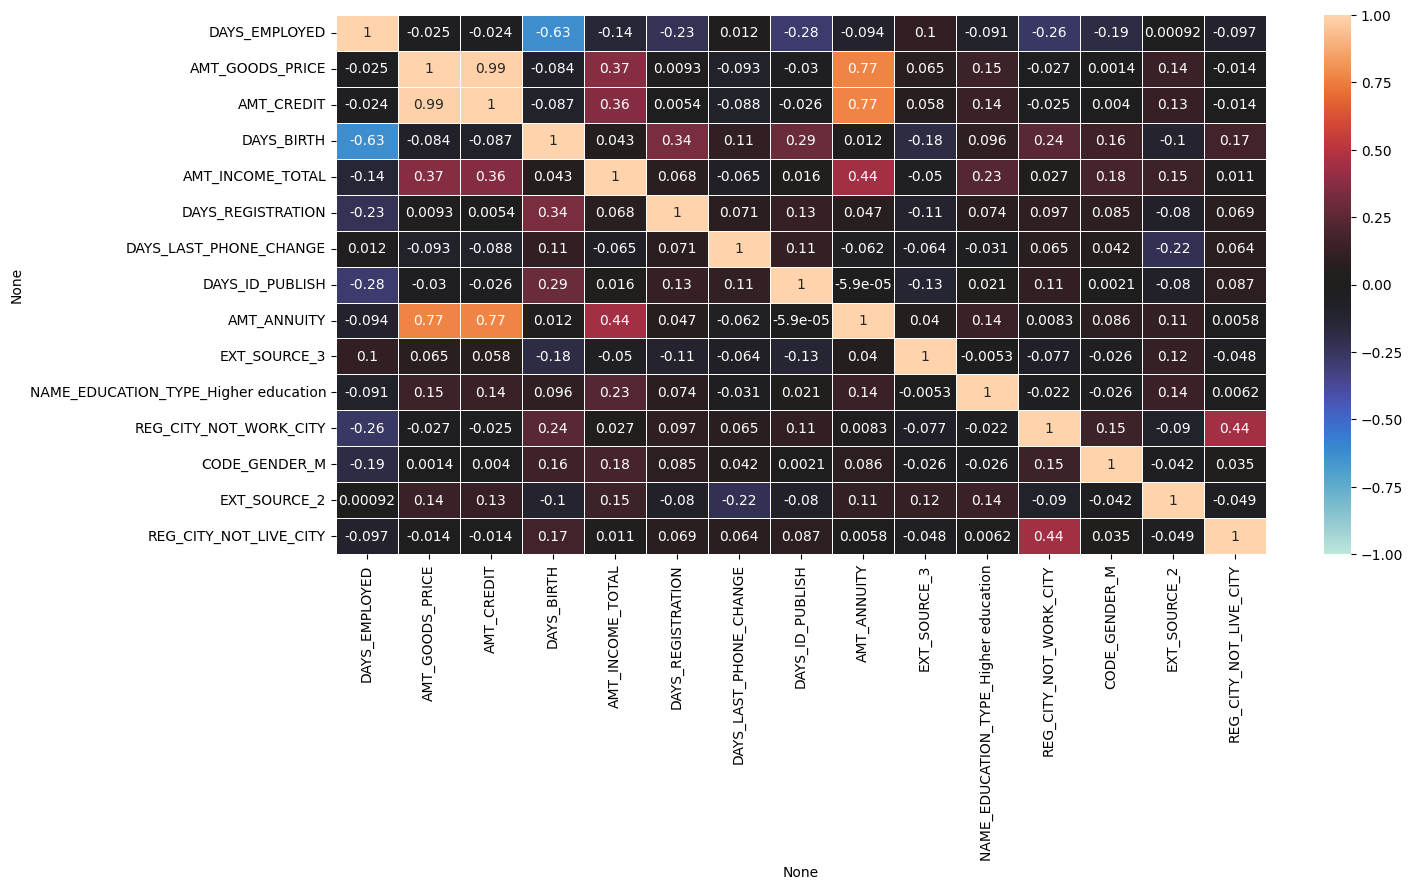

In [ ]:
all_col = train_x_imp_df.iloc[:,:].columns.tolist()
plt.figure(figsize=(15,7))

sns.heatmap(train_x_imp_df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

- There is very high positive correlationbetween `AMT_CREDIT` and `AMT_GOODS_PRICE`.
- There is high negative correlation between `DAYS_BIRTH`& `DAYS_EMPLOYED`.
- `AMT_GOODS_PRICE` and `AMT_CREDIT`are positively correlated to `AMT_ANNUITY`.
- There is positive correlation between `REG_CITY_NOT_WORK_CITY`and `REG_CITY_NOT_LIV_CITY`.
_ all other features also shows noticeable positive or negative correlations

In [ ]:
## Function to create confusion matrix
def build_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(valid_x_imp_df)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - 0","Actual - 1"]],
                  columns = [i for i in ['Predicted - 0','Predicted - 1']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def model_metrics_score(model,X_train,Y_train,X_test,Y_test,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)

    #Recall of the model
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set :",model.score(X_train,Y_train)*100,"%")
        print("Accuracy on test set : ",model.score(X_test,Y_test)*100,"%")
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train)*100,"%")
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test)*100,"%")
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train)*100,"%")
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test)*100,"%")

    return score_list # returning the list with train and test scores

# Algorithm Selection<a id= "Algorithm"></a>

- For this case we will have broadly two diffrent type of Algorithms,  

**1:Bagging** :
- Parallel Training - All the weak learners are built in parallel i.e. independent of each other.
- Equal weightage - Each weak learner has equal weight in the final prediction.
- Independent samples - Samples are drawn from the original dataset with replacement to train each individual weak learner.
- Can help reduce variance of the model
- Example: Bagging Classifier, Random Forest etc.

**2:Boosting** :
- Sequential Training - Successive weak learners to improve the accuracy from the prior learners.
- Weighted average - More weight to those weak learners with better performance.
- Dependent samples - Subsequent samples have more of those observations which had relatively higher errors in previous weak learners.
- Can help reduce bias of the model.
- Example: AdaBoost, Gradient Boosting Classifier, XGBOOST

**The approach is to build all the models, improve their performance using cross validation method of hyperparameter tuning. after that we will compare the score of all the models and select the best performing model**

# Model Building- Bagging<a id='Bagging'></a>

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(train_x_imp_df,train_y_sm)

BaggingClassifier(random_state=1)

In [ ]:
bagging_estimator_score=model_metrics_score(bagging_estimator,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y)

Accuracy on training set : 99.44108387279353 %
Accuracy on test set :  86.10926434455847 %
Recall on training set :  99.01659061162404 %
Recall on test set :  16.743499082486686 %
Precision on training set :  99.86442613007956 %
Precision on test set :  15.863121740236611 %


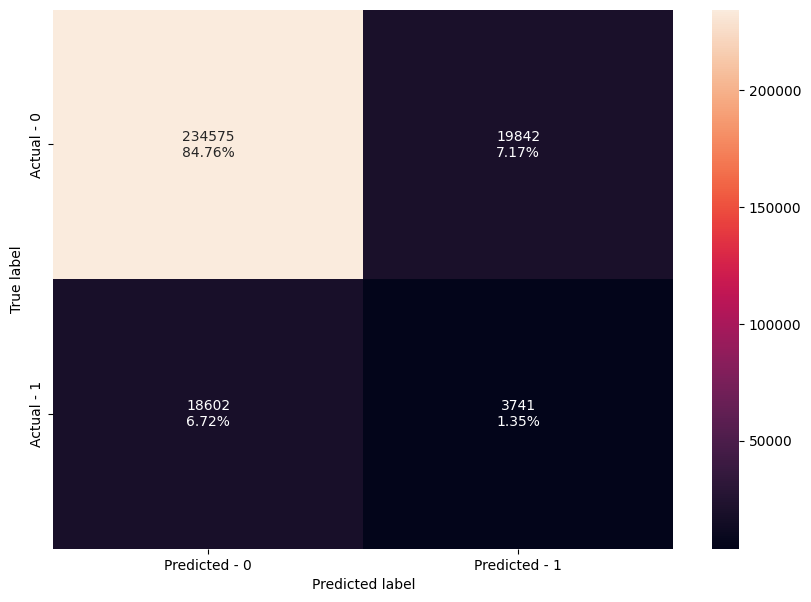

In [ ]:
build_confusion_matrix(bagging_estimator,valid_y)

### Random Forest Classifier

In [ ]:
#Train the random forest classifier
random_forest_estimator=RandomForestClassifier(random_state=1)
random_forest_estimator.fit(train_x_imp_df,train_y_sm)

RandomForestClassifier(random_state=1)

In [ ]:
random_forest_estimator_score=model_metrics_score(random_forest_estimator,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y)

Accuracy on training set : 100.0 %
Accuracy on test set :  87.44291082526377 %
Recall on training set :  100.0 %
Recall on test set :  15.544018260752809 %
Precision on training set :  100.0 %
Precision on test set :  17.942756767927257 %


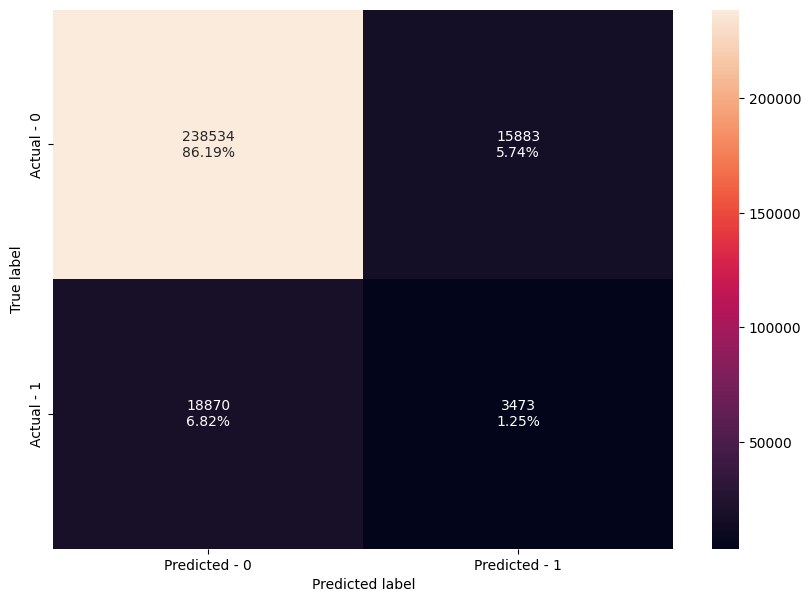

In [ ]:
build_confusion_matrix(random_forest_estimator,valid_y)

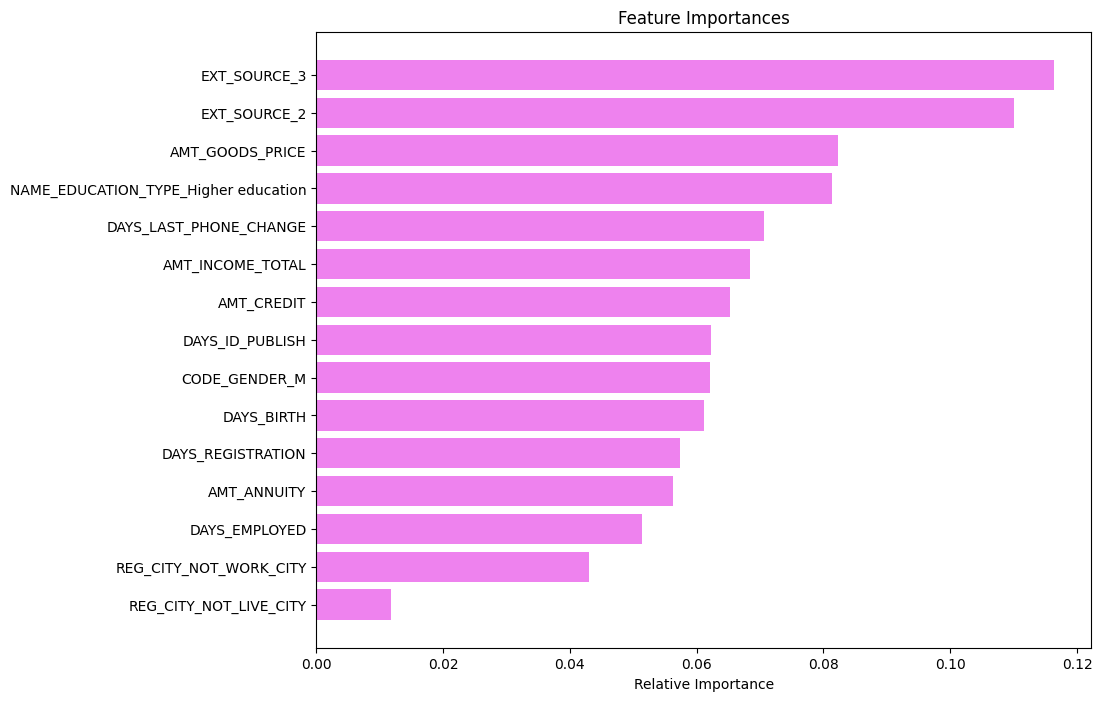

In [ ]:
#feature = list(important_feature['features'])
importances = random_forest_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
# plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.yticks(range(len(indices)), [col_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Build Decision Tree Model

In [ ]:
# DecisionTreeClassifier function. Using default 'gini' criteria to split.
DT_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
DT_model.fit(train_x_imp_df,train_y_sm)

DecisionTreeClassifier(random_state=1)

In [ ]:
DT_model_score=model_metrics_score(DT_model,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y)

Accuracy on training set : 100.0 %
Accuracy on test set :  77.55600520306403 %
Recall on training set :  100.0 %
Recall on test set :  27.41798326097659 %
Precision on training set :  100.0 %
Precision on test set :  11.775108121095627 %


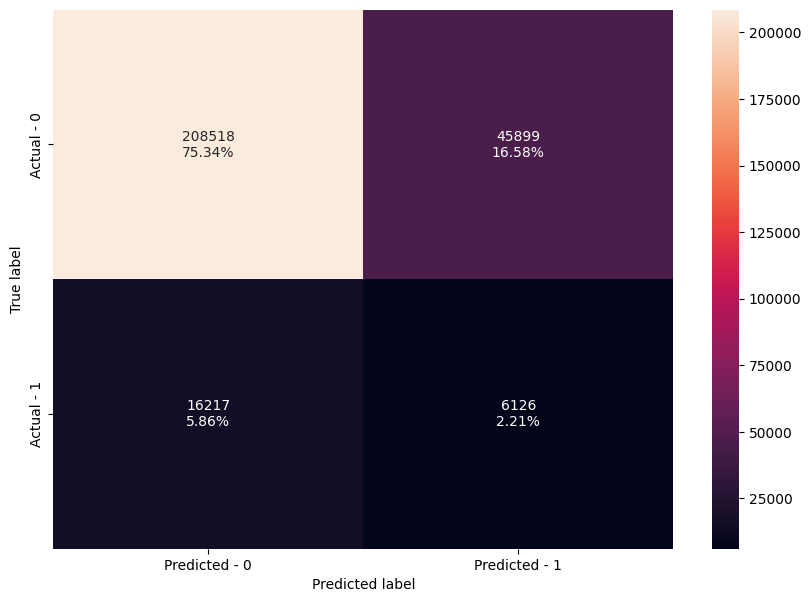

In [ ]:
build_confusion_matrix(DT_model,valid_y)

# Model building - Boosting <a id='Boosting'></a>
- Build Adaboost, gradient boost, xgboost, and stacking classifier

### Build model with AdaBoost Classifier

In [ ]:
# Selecting the type of classifier for AdaBoost.
AdaBoost = AdaBoostClassifier(random_state=1)
AdaBoost.fit(train_x_imp_df,train_y_sm)

AdaBoostClassifier(random_state=1)

In [ ]:
AdaBoost_score=model_metrics_score(AdaBoost,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y) # Performance check for AdaBoost

Accuracy on training set : 81.37889561003219 %
Accuracy on test set :  78.36103483162307 %
Recall on training set :  80.68909406063179 %
Recall on test set :  36.190305688582555 %
Precision on training set :  81.81785573370638 %
Precision on test set :  15.052962749222779 %


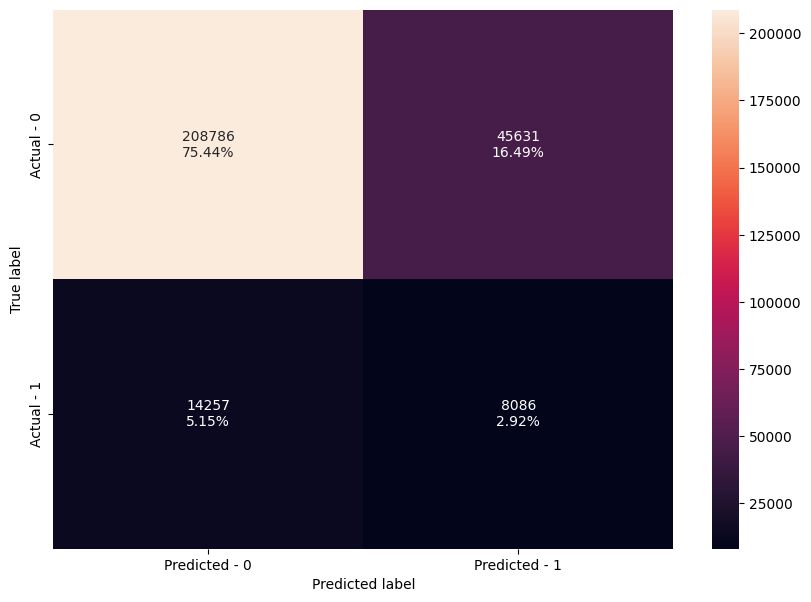

In [ ]:
build_confusion_matrix(AdaBoost,valid_y)

### Build model with GradientBoosting Classifier

In [ ]:
GradientBoost = GradientBoostingClassifier(random_state=1)
GradientBoost.fit(train_x_imp_df,train_y_sm)

GradientBoostingClassifier(random_state=1)

In [ ]:
GradientBoost_score=model_metrics_score(GradientBoost,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y) # Performance check for GradientBoost model

Accuracy on training set : 86.81417807492306 %
Accuracy on test set :  84.01322445440093 %
Recall on training set :  84.43878453429552 %
Recall on test set :  25.62323770308374 %
Precision on training set :  88.65037510213178 %
Precision on test set :  17.165387383065482 %


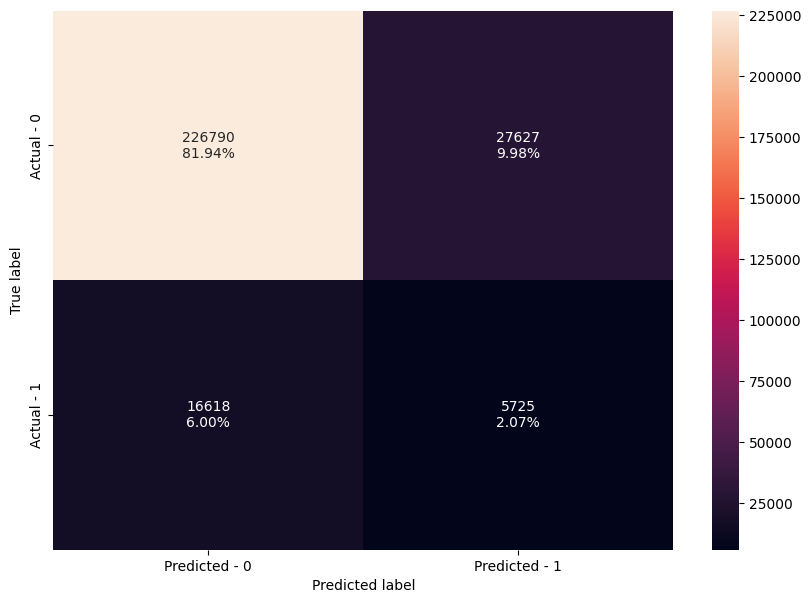

In [ ]:
build_confusion_matrix(GradientBoost,valid_y)

### Build model with XGBoost Classifier

In [ ]:
XGBoost = XGBClassifier(random_state=1)
XGBoost.fit(train_x_imp_df,train_y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
XGBoost_score=model_metrics_score(XGBoost,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y) # Performance check for XGBoost model

Accuracy on training set : 95.62595068803283 %
Accuracy on test set :  89.55954617719324 %
Recall on training set :  92.76238989706039 %
Recall on test set :  9.036387235375733 %
Precision on training set :  98.39774859287054 %
Precision on test set :  19.06515580736544 %


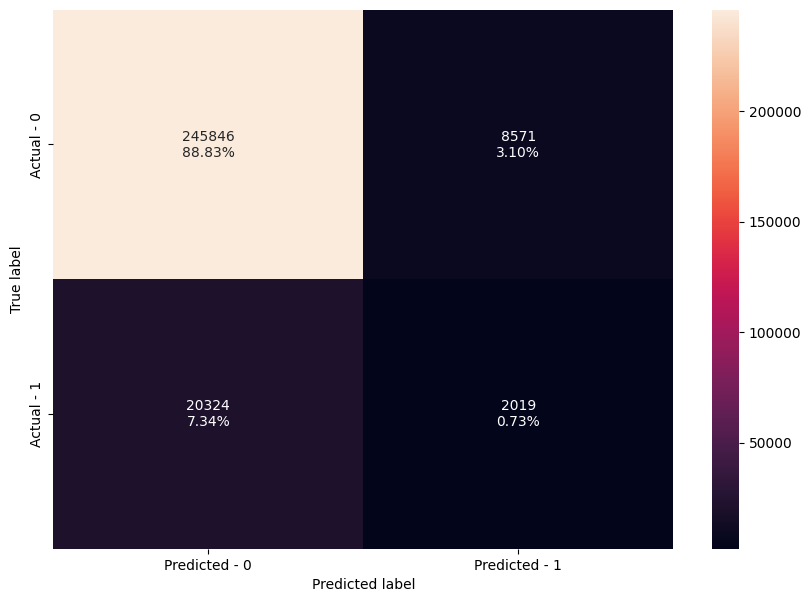

In [ ]:
build_confusion_matrix(XGBoost,valid_y)

# Model performance improvement<a id='Improvement'></a>


### Model performance improvement - Bagging Models

**With default parameters:**

- All three models - Bagging classifiers,random forest and decission tree classifier are overfitting the train data.
- All three models are giving similar performance in terms of accuracy but decission tree is giving better recall.
- Selecting `precision` and `Recall` as right matric for performance - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives and high true positives. this model is for a marketing campaign of tour company where high volume is the goal i.e. there is little or no harm in the “mistake.” if we select a customer who will not buy but we should not miss a real customers.
- We will check to improve the `Recall`

### Hyperparameter Tuniing - Bagging Classifier

In [ ]:
# Selecting the type of classifier.
Tune_bagging_estimator = BaggingClassifier(random_state=1)

# Paramater selection for tuning
## max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator.
## max_features: The number of features to consider when looking for the best split.
## n_estimators: The number of trees in the forest, default = 100.

parameters = {'max_samples': [0.8,0.9,1],
              'max_features': [0.8,0.9,1],
              'n_estimators' : [30,40,50],
             }

# Type of scoring used to compare parameter combinations
bagging_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_object = GridSearchCV(Tune_bagging_estimator, parameters, scoring=bagging_scorer,cv=5)
grid_object = grid_object.fit(train_x_imp_df,train_y_sm)

# Setting the clf to the best combination of parameters
Tune_bagging_estimator = grid_object.best_estimator_

# Fit the best algorithm as per set clf to the data.
Tune_bagging_estimator.fit(train_x_imp_df,train_y_sm)

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=30,
                  random_state=1)

In [ ]:
#Using previously already defined function to get accuracy, recall and precision on train and test set
Tuned_bagging_estimator_score=model_metrics_score(Tune_bagging_estimator,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y)

Accuracy on training set : 50.0 %
Accuracy on test set :  8.07305969070675 %
Recall on training set :  100.0 %
Recall on test set :  100.0 %
Precision on training set :  50.0 %
Precision on test set :  8.07305969070675 %


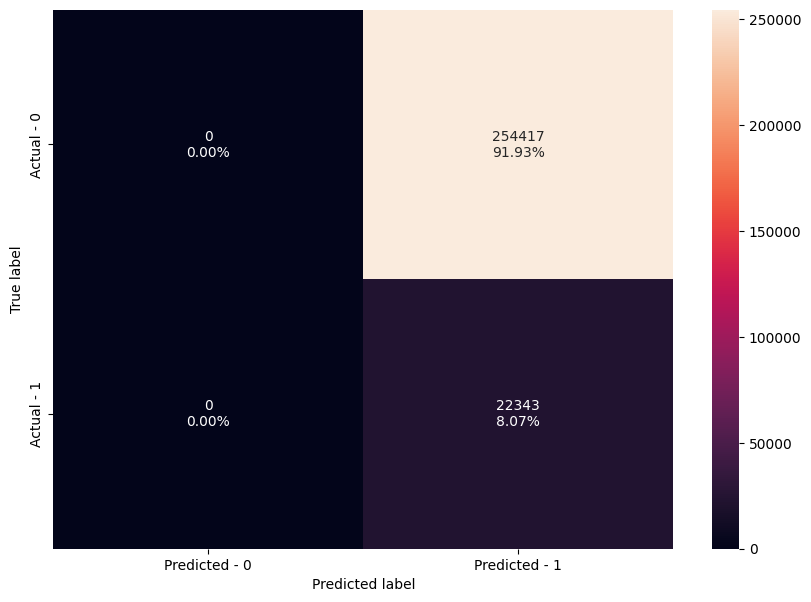

In [ ]:
build_confusion_matrix(Tune_bagging_estimator,valid_y)

### Hyperparameter Tuning - Random Forest Classifier
- Now, we will try to get a better model by tuning the random forest classifier

In [ ]:
# Selecting the type of classifier.
Tune_random_forest_estimator = RandomForestClassifier(random_state=1)

# Paramater selection for tuning

## n_estimators: The number of trees in the forest, default = 100.
## min_samples_leaf: to control the growth of tree
## max_features: The number of features to consider when looking for the best split.
## max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator.

parameters = {"n_estimators": [200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7),
    "max_samples": np.arange(0.3, 0.7),
             }

# Type of scoring used to compare parameter combinations
rf_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_object = GridSearchCV(Tune_random_forest_estimator, parameters, scoring=rf_scorer,cv=5)
grid_object = grid_object.fit(train_x_imp_df,train_y_sm)

# Setting the clf to the best combination of parameters
Tune_random_forest_estimator = grid_object.best_estimator_

# Fit the best algorithm as per set clf to the data.
Tune_random_forest_estimator.fit(train_x_imp_df,train_y_sm)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [ ]:
Tuned_random_forest_estimator_score=model_metrics_score(Tune_random_forest_estimator,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y)

Accuracy on training set : 91.61448936998126 %
Accuracy on test set :  84.47897094955918 %
Recall on training set :  89.61760232056317 %
Recall on test set :  25.439735040057286 %
Precision on training set :  93.34561532792925 %
Precision on test set :  17.773052750070352 %


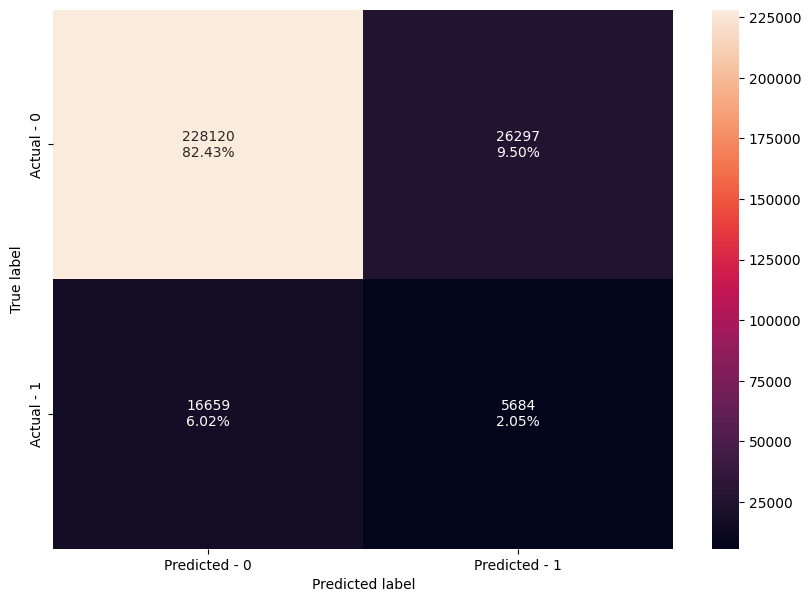

In [ ]:
build_confusion_matrix(Tune_random_forest_estimator,valid_y)

In [ ]:
# Selecting the type of classifier.
Tune_rf_estimator_weighted= RandomForestClassifier(random_state=1)


## This time adding class weight
parameters = {
    "class_weight": [{0: 0.4, 1: 0.6}],
    "n_estimators": [200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7),
    "max_samples": np.arange(0.3,0.7),
}

# Type of scoring used to compare parameter combinations
rf_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_object = GridSearchCV(Tune_rf_estimator_weighted, parameters, scoring=rf_scorer,cv=5)
grid_object = grid_object.fit(train_x_imp_df,train_y_sm)

# Set the clf to the best combination of parameters
Tune_rf_estimator_weighted = grid_object.best_estimator_

# Fit the best algorithm to the data.
Tune_rf_estimator_weighted.fit(train_x_imp_df,train_y_sm)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_features=0.2,
                       max_samples=0.3, min_samples_leaf=7, n_estimators=200,
                       random_state=1)

In [ ]:
Tune_rf_estimator_weighted_score=model_metrics_score(Tune_rf_estimator_weighted,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y)

Accuracy on training set : 89.79447451271712 %
Accuracy on test set :  80.05094666859372 %
Recall on training set :  91.89217871166295 %
Recall on test set :  35.89043548314908 %
Precision on training set :  88.1921575284332 %
Precision on test set :  16.39676113360324 %


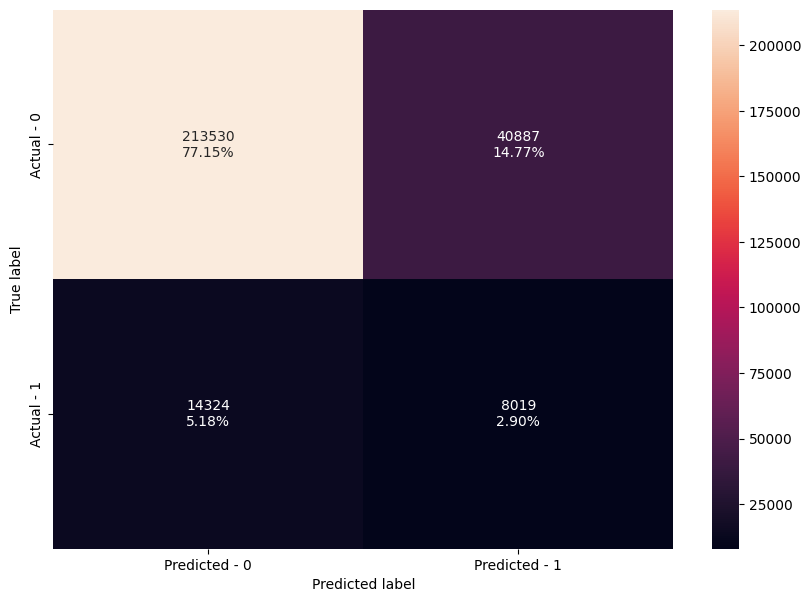

In [ ]:
build_confusion_matrix(Tune_rf_estimator_weighted,valid_y)

### Hyperparameter Tuning - Decission Tree Classifier
- Now, we will try to get a better model by tuning the Decission Tree classifier

In [ ]:
# Selecting the type of classifier.
Tune_DT_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)


parameters = {'max_depth': list(np.arange(2,20)),
              'min_samples_leaf': [7, 10],
              'max_leaf_nodes' : [10, 15],
              'min_impurity_decrease': [0.001, 0.01]
             }

# Type of scoring used to compare parameter combinations
Tune_DT_model_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_object = GridSearchCV(Tune_DT_model, parameters, scoring=Tune_DT_model_scorer,cv=5)
grid_object = grid_object.fit(train_x_imp_df,train_y_sm)

# Set the clf to the best combination of parameters
Tune_DT_model = grid_object.best_estimator_

# Fit the best algorithm to the data.
Tune_DT_model.fit(train_x_imp_df,train_y_sm)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
Tuned_DT_model_score=model_metrics_score(Tune_DT_model,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y)

Accuracy on training set : 69.19947645831122 %
Accuracy on test set :  60.831044948692 %
Recall on training set :  77.66457957479925 %
Recall on test set :  61.49577048740098 %
Precision on training set :  66.41960369081833 %
Precision on test set :  12.101355457499933 %


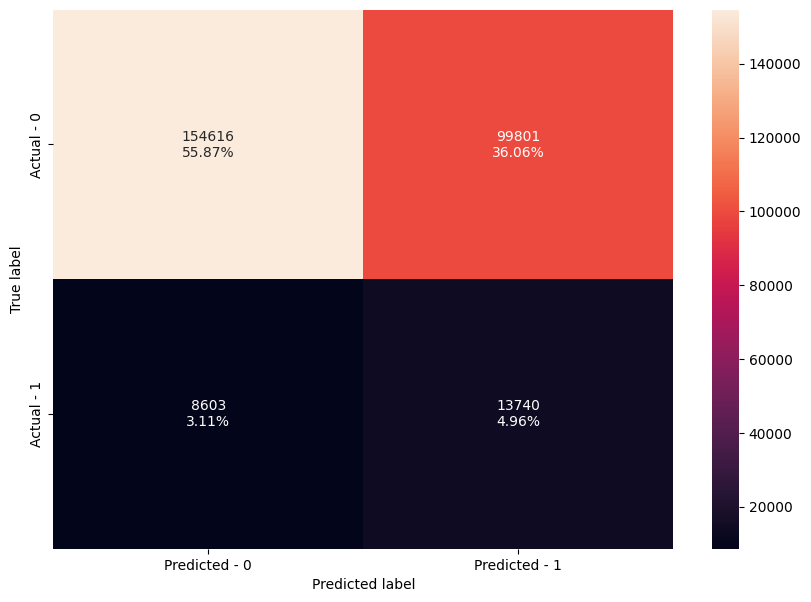

In [ ]:
build_confusion_matrix(Tune_DT_model,valid_y)

### Build Stacking Model

**Now, building a stacking model with the previously tuned models - decision tree, random forest and default untuned gradient boosting. going to use XGboost as final estimator**

In [ ]:
from sklearn.ensemble import StackingClassifier
stack_estimators=[('AdaBoost', AdaBoost),('Random Forest', Tune_rf_estimator_weighted),
           ('Gradient Boosting', GradientBoost)]
final_estimator=XGBClassifier(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=stack_estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(train_x_imp_df,train_y_sm)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.4,
                                                                     1: 0.6},
                                                       max_features=0.2,
                                                       max_samples=0.3,
                                                       min_samples_leaf=7,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, boo...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Model performance improvement - Boosting Models

### Tuning AdaBoost Classifier

In [ ]:
# Selecting the type of classifier.
Tune_AdaBoost = AdaBoostClassifier(random_state=1)

# Paramater selection for tuning
## base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1.
## n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
## learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,30),
    "learning_rate":np.arange(0.1,2,0.3)
}


# Type of scoring used to compare parameter combinations
Tune_AdaBoost_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_object = GridSearchCV(Tune_AdaBoost, parameters, scoring=Tune_AdaBoost_scorer,cv=5)
grid_object = grid_object.fit(train_x_imp_df,train_y_sm)

# Setting the clf to the best combination of parameters
Tune_AdaBoost = grid_object.best_estimator_

# Fit the best algorithm as per set clf to the data.
Tune_AdaBoost.fit(train_x_imp_df,train_y_sm)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.0000000000000002, n_estimators=100,
                   random_state=1)

In [ ]:
Tuned_AdaBoost_score=model_metrics_score(Tune_AdaBoost,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y) # Performance check for Tuned AdaBoost model

Accuracy on training set : 92.87735682196046 %
Accuracy on test set :  87.31825408295997 %
Recall on training set :  90.70713502423149 %
Recall on test set :  14.263975294275614 %
Precision on training set :  94.82286813105539 %
Precision on test set :  16.660567724397513 %


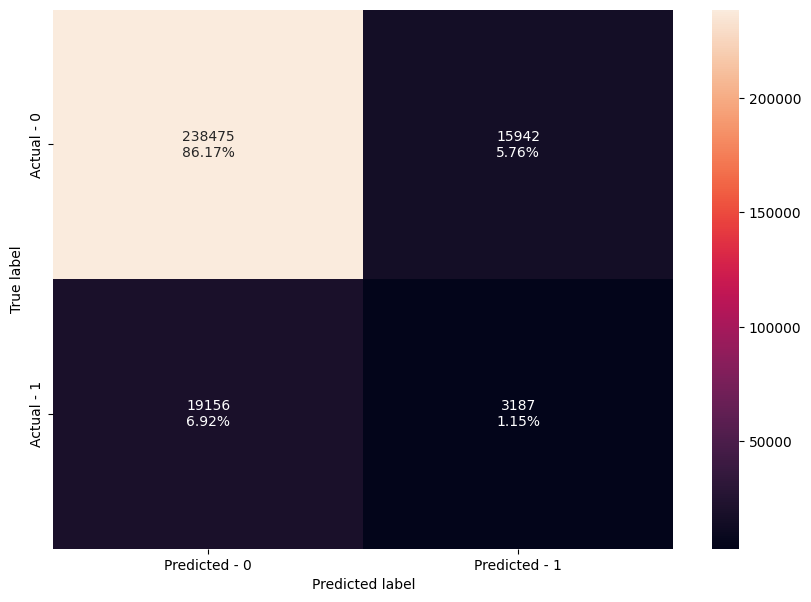

In [ ]:
build_confusion_matrix(Tune_AdaBoost ,valid_y)

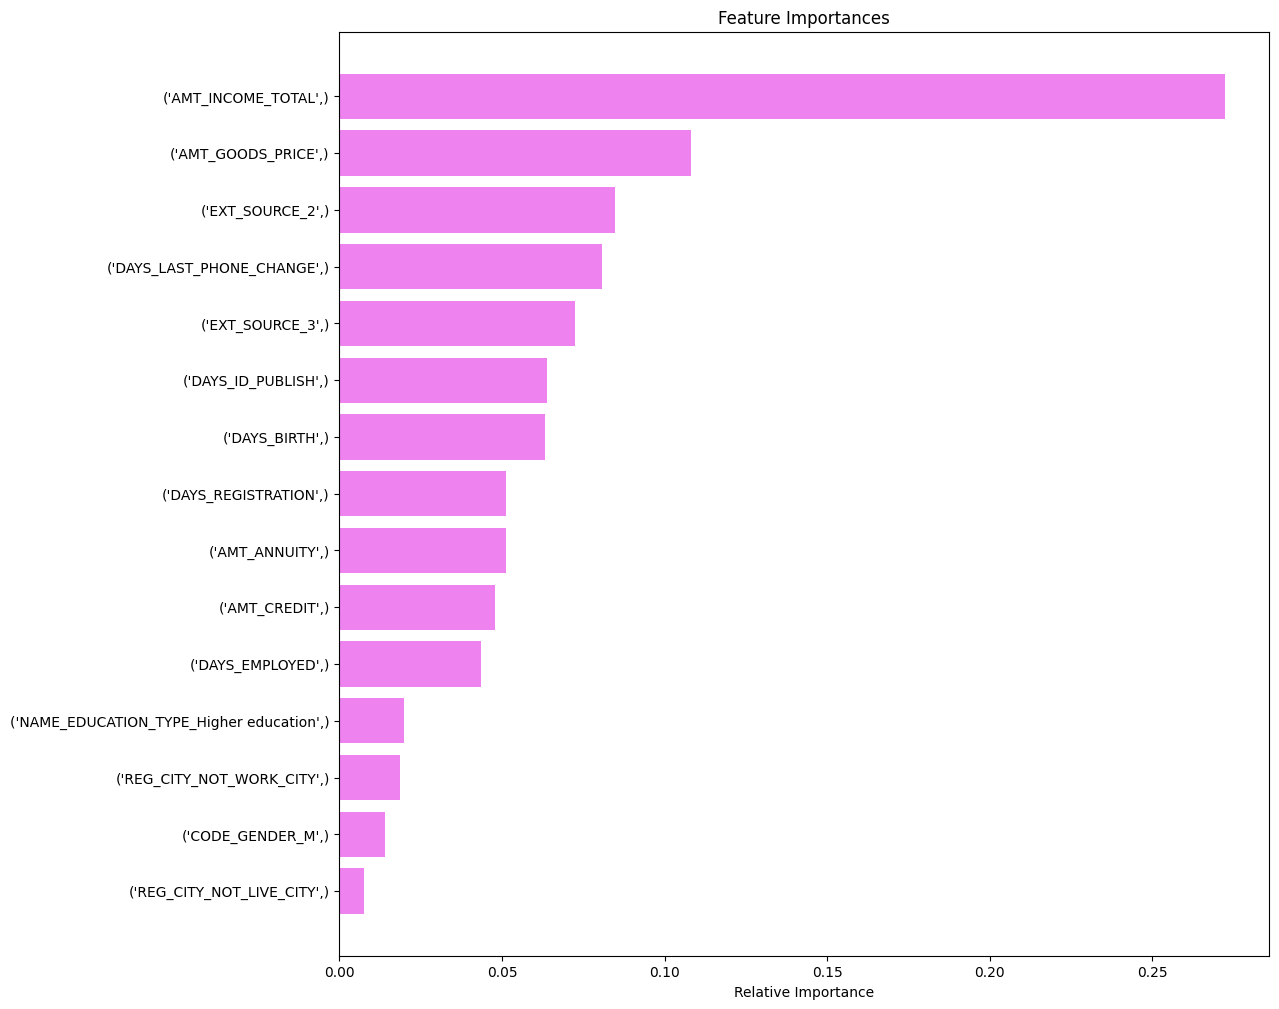

In [ ]:
importances = Tune_AdaBoost.feature_importances_
indices = np.argsort(importances)
feature_names = list(train_x_imp_df.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Tuning GradientBoosting Classifier

In [ ]:
# Selecting the type of classifier.
Tune_GradientBoost = GradientBoostingClassifier(init=Tune_AdaBoost,random_state=1)

# init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
# Subsample: number of rows or subset of the data to consider for each tree.


parameters = {
    "n_estimators": [200,250],
    "subsample":[0.9,1],
    "max_features":[0.8,0.9,1]
}


# Type of scoring used to compare parameter combinations
Tuned_GradientBoost_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_object = GridSearchCV(Tune_GradientBoost, parameters, scoring=Tuned_GradientBoost_scorer,cv=5)
grid_object = grid_object.fit(train_x_imp_df,train_y_sm)

# Setting the clf to the best combination of parameters
Tune_GradientBoost = grid_object.best_estimator_

# Fit the best algorithm as per set clf to the data.
Tune_GradientBoost.fit(train_x_imp_df,train_y_sm)

GradientBoostingClassifier(init=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.0000000000000002,
                                                   n_estimators=100,
                                                   random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

In [ ]:
Tuned_GradientBoost_score=model_metrics_score(Tune_GradientBoost,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y) # Performance check for Tuned GradientBoost model

Accuracy on training set : 90.75842795995614 %
Accuracy on test set :  87.07508310449487 %
Recall on training set :  88.00806537196222 %
Recall on test set :  16.559996419460234 %
Precision on training set :  93.13094257692596 %
Precision on test set :  17.7645477242174 %


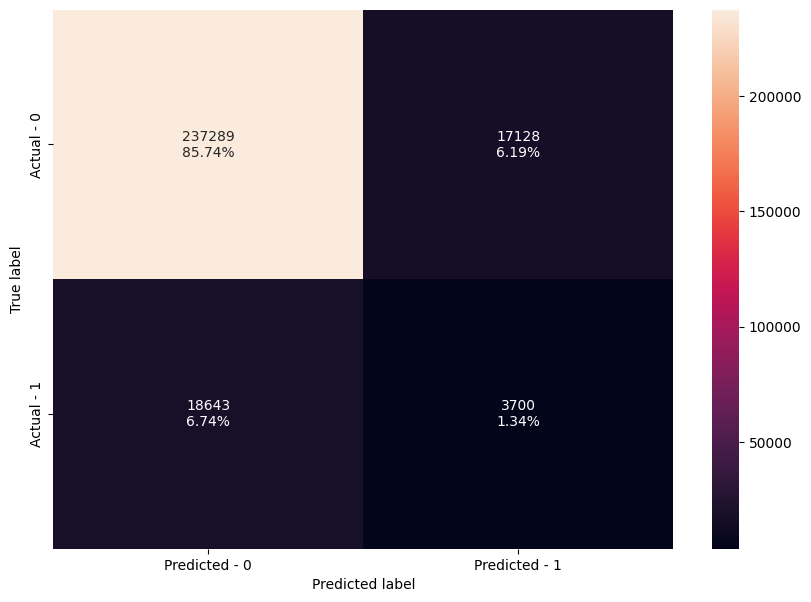

In [ ]:
build_confusion_matrix(Tune_GradientBoost ,valid_y)

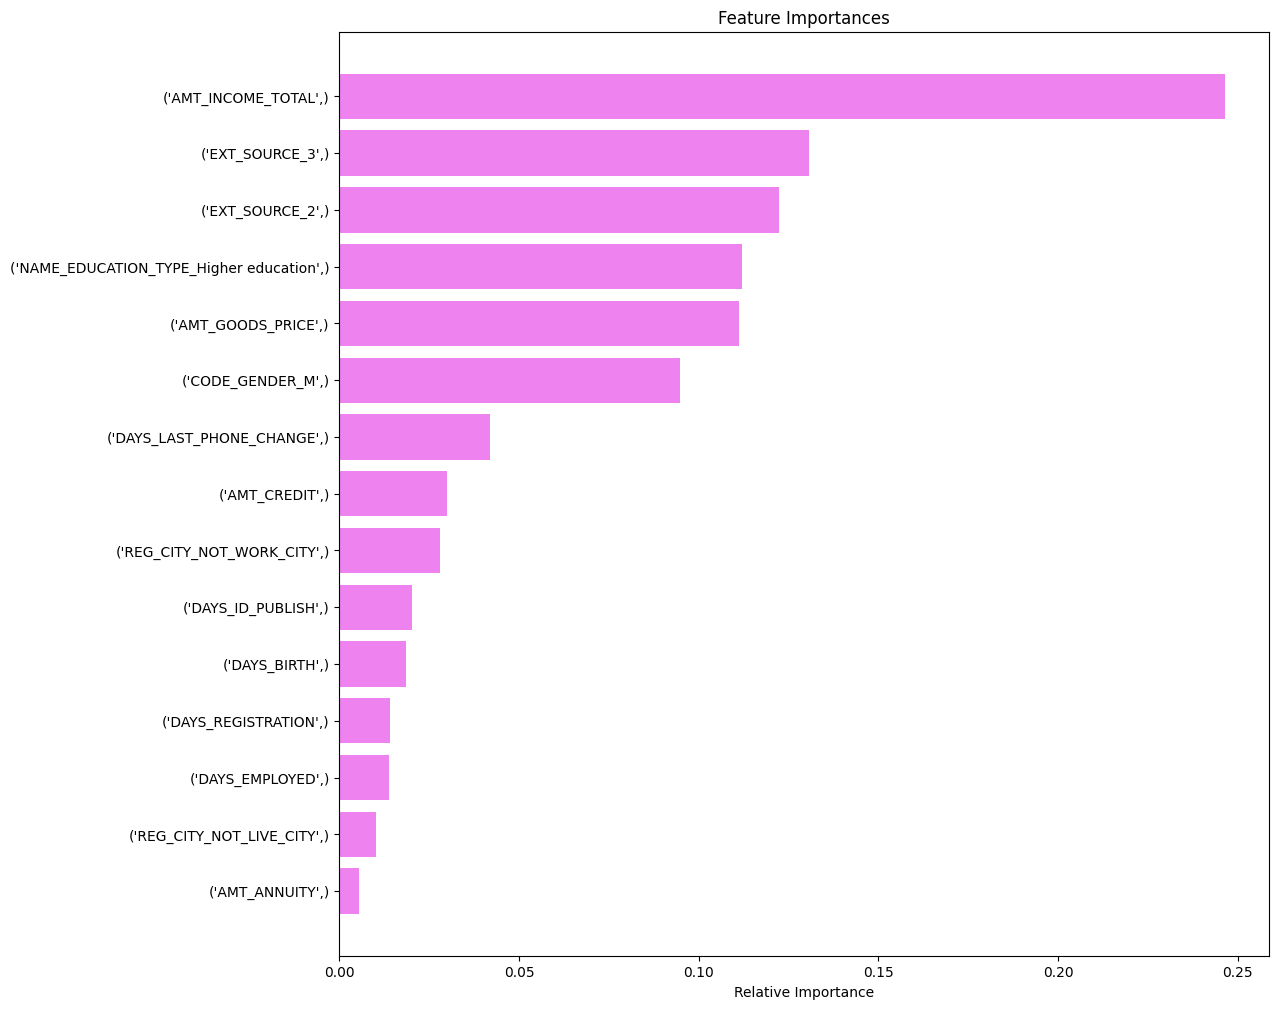

In [ ]:
importances = Tune_GradientBoost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Tuning XGBoost Classifier

In [ ]:
# Selecting the type of classifier.
Tune_XGBoost = XGBClassifier(random_state=1)

# scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to infinity.
# subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
# learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
# gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
# colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
# colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[6,8],
    "subsample":[0.8,0.9],
    "learning_rate":[0.001,0.01,0.1],
    "gamma":[1,2],
    "colsample_bytree":[0.5,0.7],
    "colsample_bylevel":[0.5,0.7]
}


# Type of scoring used to compare parameter combinations
Tuned_XGBoost_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_object = GridSearchCV(Tune_XGBoost, parameters, scoring=Tuned_XGBoost_scorer,cv=5)
grid_object = grid_object.fit(train_x_imp_df,train_y_sm)

# Setting the clf to the best combination of parameters
Tune_XGBoost = grid_object.best_estimator_

# Fit the best algorithm as per set clf to the data.
Tune_XGBoost.fit(train_x_imp_df,train_y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
Tuned_XGBoost_score=model_metrics_score(Tune_XGBoost,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y) # Performance check for Tuned XGBoost model

Accuracy on training set : 53.27036683292653 %
Accuracy on test set :  13.697788697788699 %
Recall on training set :  99.97170044925537 %
Recall on test set :  98.68415163585911 %
Precision on training set :  51.69096263237796 %
Precision on test set :  8.460697223767772 %


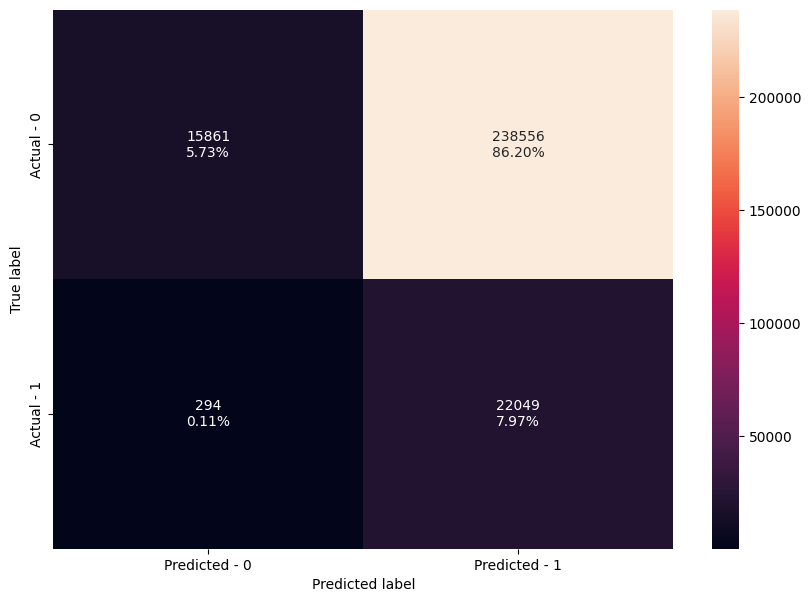

In [ ]:
build_confusion_matrix(Tune_XGBoost,valid_y)

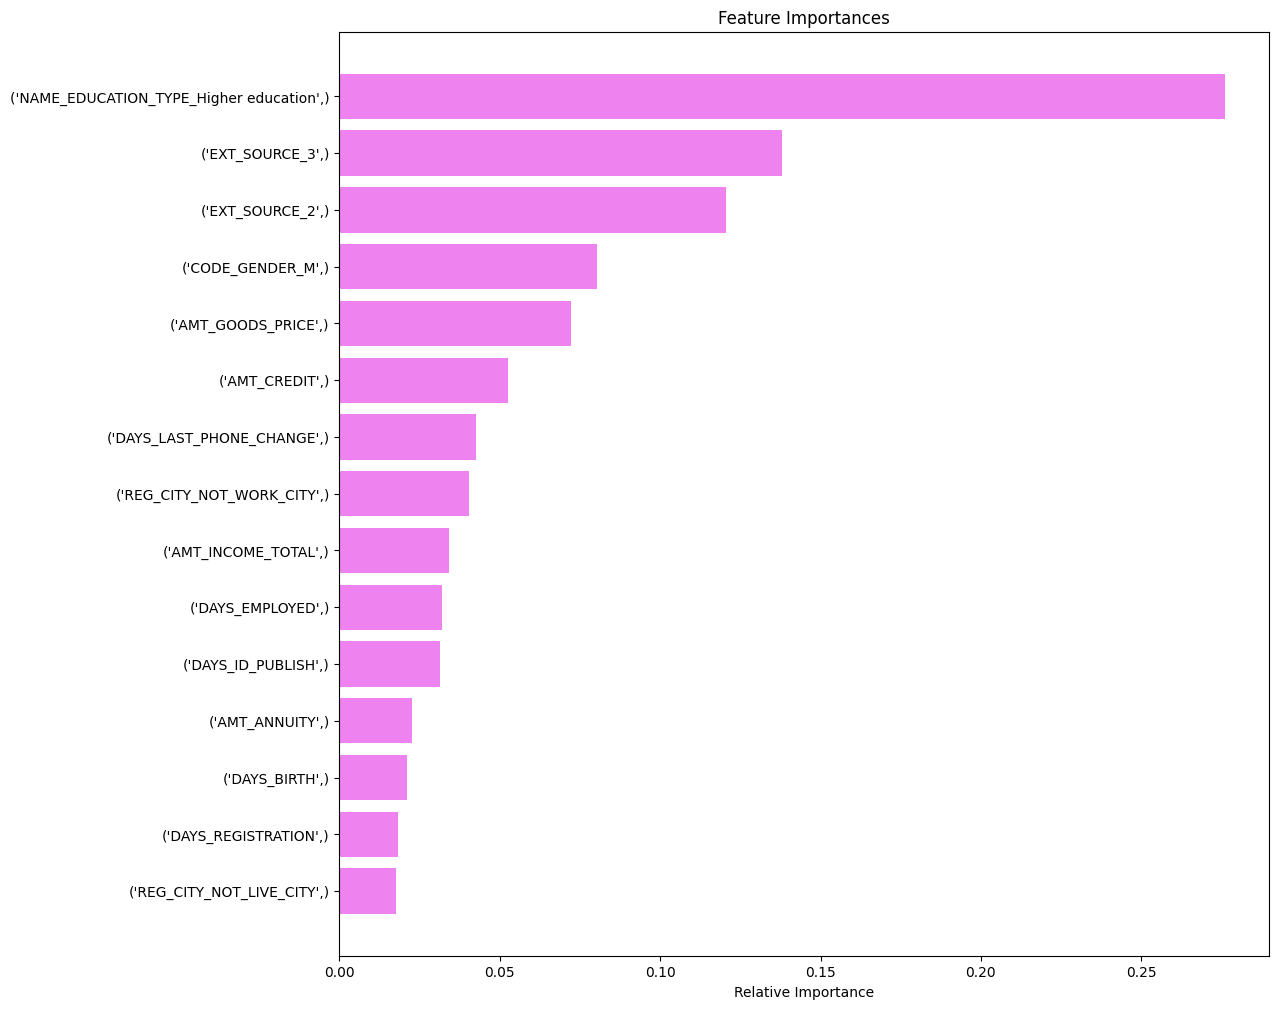

In [ ]:
importances = Tune_XGBoost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Build Stacking Model with all tuned models

In [ ]:
tuned_stack_estimators=[('AdaBoost', Tune_AdaBoost),('Random Forest', Tune_rf_estimator_weighted),
           ('Gradient Boosting', Tune_GradientBoost)]
final_estimator=XGBClassifier(random_state=1)

In [ ]:
stacking_estimator_tuned=StackingClassifier(estimators=tuned_stack_estimators, final_estimator=final_estimator,cv=5)
stacking_estimator_tuned.fit(train_x_imp_df,train_y_sm)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.0000000000000002,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.4,
                                                                     1: 0.6},
                                                       max_features=0.2,
                                                       max_samples=0.3,
                                                       min_samples_leaf=7,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boo...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

In [ ]:
Tuned_stacking_estimator_score=model_metrics_score(stacking_estimator_tuned,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y) # Performance check for Tuned stacking_estimator model

Accuracy on training set : 92.99939863454668 %
Accuracy on test set :  89.39839572192514 %
Recall on training set :  88.7014043652057 %
Recall on test set :  8.924495367676677 %
Precision on training set :  97.04322922713727 %
Precision on test set :  18.15037320225742 %


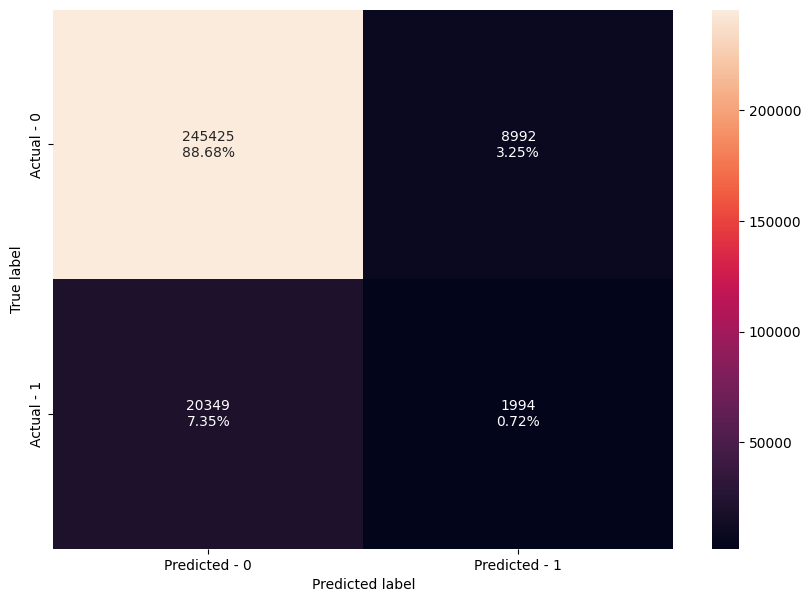

In [ ]:
build_confusion_matrix(stacking_estimator_tuned ,valid_y)

# Model Comparison and performance evaluation<a id='Comparison'></a>
- Evaluation of the models on different performance metrics and comment on the performance and scope of improvement

In [ ]:
# defining list of models to compare
models = [bagging_estimator, Tune_bagging_estimator,random_forest_estimator, Tune_random_forest_estimator, Tune_rf_estimator_weighted, DT_model, Tune_DT_model, AdaBoost,
         Tune_AdaBoost, GradientBoost, Tune_GradientBoost, XGBoost, Tune_XGBoost, stacking_estimator,stacking_estimator_tuned]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, recall and precision scores
for model in models:
    j = model_metrics_score(model,train_x_imp_df,train_y_sm,valid_x_imp_df,valid_y,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Bagging with default paramters','Bagging Tuned',
                                          'Random Forest with default parameters','Random Forest Tuned without weight',
                                          'Random Forest Tuned with weight','Decission Tree with default parameters','Decission Tree Tuned','AdaBoost Default',
                                         'AdaBoost Tuned', 'GradientBoost default','GradientBoost Tuned','XGBoost default', 'XGBoost Tuned','Stacking','Stacking with Tuned Models'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0           Bagging with default paramters            0.99           0.86   
1                            Bagging Tuned            0.50           0.08   
2    Random Forest with default parameters            1.00           0.87   
3       Random Forest Tuned without weight            0.92           0.84   
4          Random Forest Tuned with weight            0.90           0.80   
5   Decission Tree with default parameters            1.00           0.78   
6                     Decission Tree Tuned            0.69           0.61   
7                         AdaBoost Default            0.81           0.78   
8                           AdaBoost Tuned            0.93           0.87   
9                    GradientBoost default            0.87           0.84   
10                     GradientBoost Tuned            0.91           0.87   
11                         XGBoost default            0.96           0.90   
12                           XGBoost Tuned            0.53           0.14   
13                                Stacking            0.91           0.85   
14              Stacking with Tuned Models            0.93           0.89   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.99         0.17             1.00            0.16  
1           1.00         1.00             0.50            0.08  
2           1.00         0.16             1.00            0.18  
3           0.90         0.25             0.93            0.18  
4           0.92         0.36             0.88            0.16  
5           1.00         0.27             1.00            0.12  
6           0.78         0.61             0.66            0.12  
7           0.81         0.36             0.82            0.15  
8           0.91         0.14             0.95            0.17  
9           0.84         0.26             0.89            0.17  
10          0.88         0.17             0.93            0.18  
11          0.93         0.09             0.98            0.19  
12          1.00         0.99             0.52            0.08  
13          0.89         0.20             0.93            0.17  
14          0.89         0.09             0.97            0.18

# Actionable Insights & Recommendations<a id='Insight'></a>

### Key takeaway and remarks

- We can use this predictive model to plan customer is more likely to default the loan introduced by loan department and can predict if the customer will be able to repay the loan or not. The ability to predict about loan repayment capability of customer can allow the business to harness the available data of existing and potential customers to make the marketing expenditure more efficient and cost-effective.
- To grow the business for credit company main aim would be to balance the trade off between losing an opportunity (to gain money by selling the loan) in case of FP and losing the money in case of FN.
- Selecting `Precision` and `Recall` as the right matrics for performance - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives and high true positives. Model `Tune_XGBoost`is suited for a credit company like this where high volume is the expected goal. if we select a customer who will repay but we should not give a loan who has high potential of not making repayments.
- This model can be used for the first screening of the customers from the database of existing and potential customers and accordingly business can focus the sales pitch and efforts to ensure most efficient and targeted campaign and take decision based on next level of evaluation of pre-screened customers.

